# CS6140: Machine Learning Fall 2024

## Exploratory Data Analysis (EDA)

You are a data scientist at an analytics firm specializing in real estate and
tourism. Your team is tasked with analyzing Airbnb data to provide insights
that will help optimize property listings and improve guest satisfaction. Your
task is to focus on Airbnb Listings dataset and the Reviews dataset (and the
data dictionary). 

### Preprocessing Data

#### Step 1: Installing the required libraries

We would be needing textblob (for sentiment analysis) and wordcloud (for identifying the mostly used words in the positive and the negative reviews). We use the python package installer (pip) in-order to install these packages

In [7]:
!pip install textblob

In [8]:
!pip install wordcloud

#### Step 2: Importing all the required modules

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from textblob import TextBlob
from wordcloud import WordCloud


# ignore all the warnings
warnings.filterwarnings('ignore')

#### Step 4: Loading the listing dataset and having some basic understanding of the dataset

In [12]:
city = 'new york'
listings = pd.read_csv(f'data/{city}/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,739333866230665371,https://www.airbnb.com/rooms/739333866230665371,20240904164109,2024-09-04,city scrape,Lovely room 2 windows tv work desk ac included,"Lovely vocation room, has work desk , tv, 2 wi...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3013025,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,572612125615500056,https://www.airbnb.com/rooms/572612125615500056,20240904164109,2024-09-04,city scrape,Room by Sunny & Bay! Sunset Park & Bay Ridge,Cozy room in a charming Sunset Park apartment....,NaN,https://a0.muscache.com/pictures/5f44a178-6043...,358089614,...,4.83,4.67,4.67,NaN,t,2,0,2,0,0.21
2,45267941,https://www.airbnb.com/rooms/45267941,20240904164109,2024-09-04,city scrape,Private Room in Luxury Apartment,NaN,NaN,https://a0.muscache.com/pictures/3c15a88e-b08a...,39162543,...,NaN,NaN,NaN,NaN,f,3,2,1,0,NaN
3,838141198693830649,https://www.airbnb.com/rooms/838141198693830649,20240904164109,2024-09-04,city scrape,Modern renovated huge apartment,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,148571080,...,NaN,NaN,NaN,NaN,f,5,5,0,0,NaN
4,1082660771919357919,https://www.airbnb.com/rooms/1082660771919357919,20240904164109,2024-09-04,city scrape,Summertime Park Slope townhouse,425 10th Street is what dreams are made of! S...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,394869975,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN


#### Step 5: Filtering out the required fields from the dataset

In [14]:
required_columns = ['id', 'host_response_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'review_scores_rating', 'instant_bookable', 'reviews_per_month', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

In [15]:
listings = listings.loc[:, required_columns]

In [16]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37541 entries, 0 to 37540
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            37541 non-null  int64  
 1   host_response_rate            22644 non-null  object 
 2   host_is_superhost             37112 non-null  object 
 3   neighbourhood_cleansed        37541 non-null  object 
 4   neighbourhood_group_cleansed  37541 non-null  object 
 5   latitude                      37541 non-null  float64
 6   longitude                     37541 non-null  float64
 7   property_type                 37541 non-null  object 
 8   room_type                     37541 non-null  object 
 9   amenities                     37541 non-null  object 
 10  price                         22790 non-null  object 
 11  minimum_nights                37541 non-null  int64  
 12  maximum_nights                37541 non-null  int64  
 13  a

In [17]:
listings.describe()

,id,latitude,longitude,minimum_nights,maximum_nights,availability_365,review_scores_rating,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3.754100e+04,37541.000000,37541.000000,37541.00000,3.754100e+04,37541.000000,26001.000000,26001.000000,37541.00000,25990.000000,26000.000000,25986.000000,25995.000000,25983.000000,25984.000000
mean,3.783277e+17,40.728722,-73.946982,28.98162,5.831645e+04,152.796596,4.725152,0.892457,25.23449,4.764045,4.656433,4.831447,4.825776,4.741619,4.642455
std,4.643902e+17,0.056340,0.054604,30.70918,1.108398e+07,142.535239,0.442850,1.864734,60.17222,0.437145,0.501060,0.377703,0.407848,0.393922,0.486093
min,2.595000e+03,40.500366,-74.251907,1.00000,1.000000e+00,0.000000,0.000000,0.010000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.063928e+07,40.688491,-73.983108,30.00000,1.500000e+02,0.000000,4.640000,0.090000,0.00000,4.710000,4.530000,4.810000,4.820000,4.650000,4.530000
50%,4.866104e+07,40.726090,-73.954540,30.00000,3.650000e+02,128.000000,4.850000,0.320000,3.00000,4.900000,4.810000,4.950000,4.960000,4.850000,4.760000
75%,8.450413e+17,40.762380,-73.927800,30.00000,1.125000e+03,294.000000,5.000000,1.070000,21.00000,5.000000,5.000000,5.000000,5.000000,5.000000,4.940000
max,1.237702e+18,40.911390,-73.713650,1250.00000,2.147484e+09,365.000000,5.000000,110.100000,1941.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Step 6: Finding out which are the columns that contain null values

In [19]:
values_contains_null = listings.columns[listings.isna().any()].tolist()
values_contains_null

['host_response_rate',
 'host_is_superhost',
 'price',
 'review_scores_rating',
 'reviews_per_month',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [20]:
len(values_contains_null)

11

### Task 1

Descriptive Statistics Calculate summary statistics for numerical features such as `price`,`minimum_nights`, `maximum_nights`, `number_of_reviews`, and `review_scores_rating`. Understand the central tendency, dispersion, and distribution of these variables

#### Identifying all the numerical columns present in the dataframe

In [23]:
numerical_columns = listings.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['id', 'latitude', 'longitude', 'minimum_nights', 'maximum_nights',
       'availability_365', 'review_scores_rating', 'reviews_per_month',
       'number_of_reviews', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

#### Type Casting: Price - Object to Float

In [25]:
listings['price'] = listings['price'].replace({'\$': '', ',': ''}, regex=True)
listings['price'] = listings['price'].astype('float')
listings['price'].dtype

dtype('float64')

#### Descriptive Statistics

To analyse the mean, median and mode for specific fields and checking the count of the NaN values.

In [27]:
def count_null(df, columns):
    for column in columns:
        print(f"{column} missing values: {df[column].isnull().sum()}")

In [28]:
required_columns = [
    'price',
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
]

In [29]:
count_null(listings, required_columns)

price missing values: 14751
minimum_nights missing values: 0
maximum_nights missing values: 0
number_of_reviews missing values: 0
review_scores_rating missing values: 11540
review_scores_accuracy missing values: 11551
review_scores_cleanliness missing values: 11541
review_scores_checkin missing values: 11555
review_scores_communication missing values: 11546
review_scores_location missing values: 11558
review_scores_value missing values: 11557
reviews_per_month missing values: 11540


#### Drop Vs Mean Imputation

Since **30%** of the price data is missing, we look at the different options. We do not perform mean imputation because nearly a third of the data is missing. Performing mean imputation and replacing with mean **will change the distribution and skewness of the data**. So, we drop the entries that don't have the values for price.

Similarly, the other attributes such as `review_scores_rating` and other review score related fields have 25% of the values missing. We drop those columns as well. 

In [31]:
not_null_listings = listings.dropna(subset=required_columns)
count_null(not_null_listings, required_columns)

price missing values: 0
minimum_nights missing values: 0
maximum_nights missing values: 0
number_of_reviews missing values: 0
review_scores_rating missing values: 0
review_scores_accuracy missing values: 0
review_scores_cleanliness missing values: 0
review_scores_checkin missing values: 0
review_scores_communication missing values: 0
review_scores_location missing values: 0
review_scores_value missing values: 0
reviews_per_month missing values: 0


In [32]:
not_null_listings.describe()

,id,latitude,longitude,price,minimum_nights,maximum_nights,availability_365,review_scores_rating,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,1.610100e+04,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000
mean,3.895477e+17,40.725409,-73.939874,211.621949,25.187131,475.869201,224.140116,4.718495,1.238469,46.888640,4.745582,4.679288,4.823073,4.806874,4.720238,4.609400
std,4.431180e+17,0.060615,0.062519,1137.887521,21.065218,431.546191,109.952204,0.468620,2.244810,80.788106,0.458304,0.488581,0.390709,0.438721,0.407891,0.517952
min,2.595000e+03,40.500366,-74.249840,10.000000,1.000000,1.000000,0.000000,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.843192e+07,40.682920,-73.981870,89.000000,30.000000,90.000000,126.000000,4.660000,0.210000,4.000000,4.700000,4.590000,4.810000,4.800000,4.630000,4.510000
50%,5.261153e+07,40.721290,-73.949819,143.000000,30.000000,365.000000,246.000000,4.850000,0.610000,17.000000,4.880000,4.820000,4.940000,4.940000,4.820000,4.750000
75%,8.206205e+17,40.763150,-73.917726,225.000000,30.000000,1125.000000,329.000000,5.000000,1.640000,55.000000,5.000000,4.980000,5.000000,5.000000,5.000000,4.890000
max,1.221844e+18,40.911147,-73.713650,100000.000000,500.000000,10000.000000,365.000000,5.000000,110.100000,1941.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Central Tendency

Finding the measures of central tendency for the selected columns and representing the distribution as a box-plot.

In [34]:
def _box_plot(ax, df, column_name):
    mean_price = df[column_name].mean()
    median_price = df[column_name].median()
    mode_price = df[column_name].mode()[0]
    
    sns.boxplot(y=df[column_name], ax=ax, color='lightblue')
    
    ax.scatter(0, mean_price, color='red', label=f'Mean: {mean_price:.2f}', zorder=5)
    ax.scatter(0, median_price, color='green', label=f'Median: {median_price:.2f}', zorder=5)
    ax.scatter(0, mode_price, color='purple', label=f'Mode: {mode_price:.2f}', zorder=5)
    
    ax.set_title(f'{column_name.capitalize()}')
    ax.set_ylabel(column_name.capitalize())
    ax.legend()


def box_plot(df, columns):
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))  
    axes = axes.flatten()  
    
    for i, column in enumerate(columns):
        _box_plot(axes[i], df, column)
    
    plt.tight_layout()
    plt.show()

#### Box Plot Distribution - Before removing the NaN values

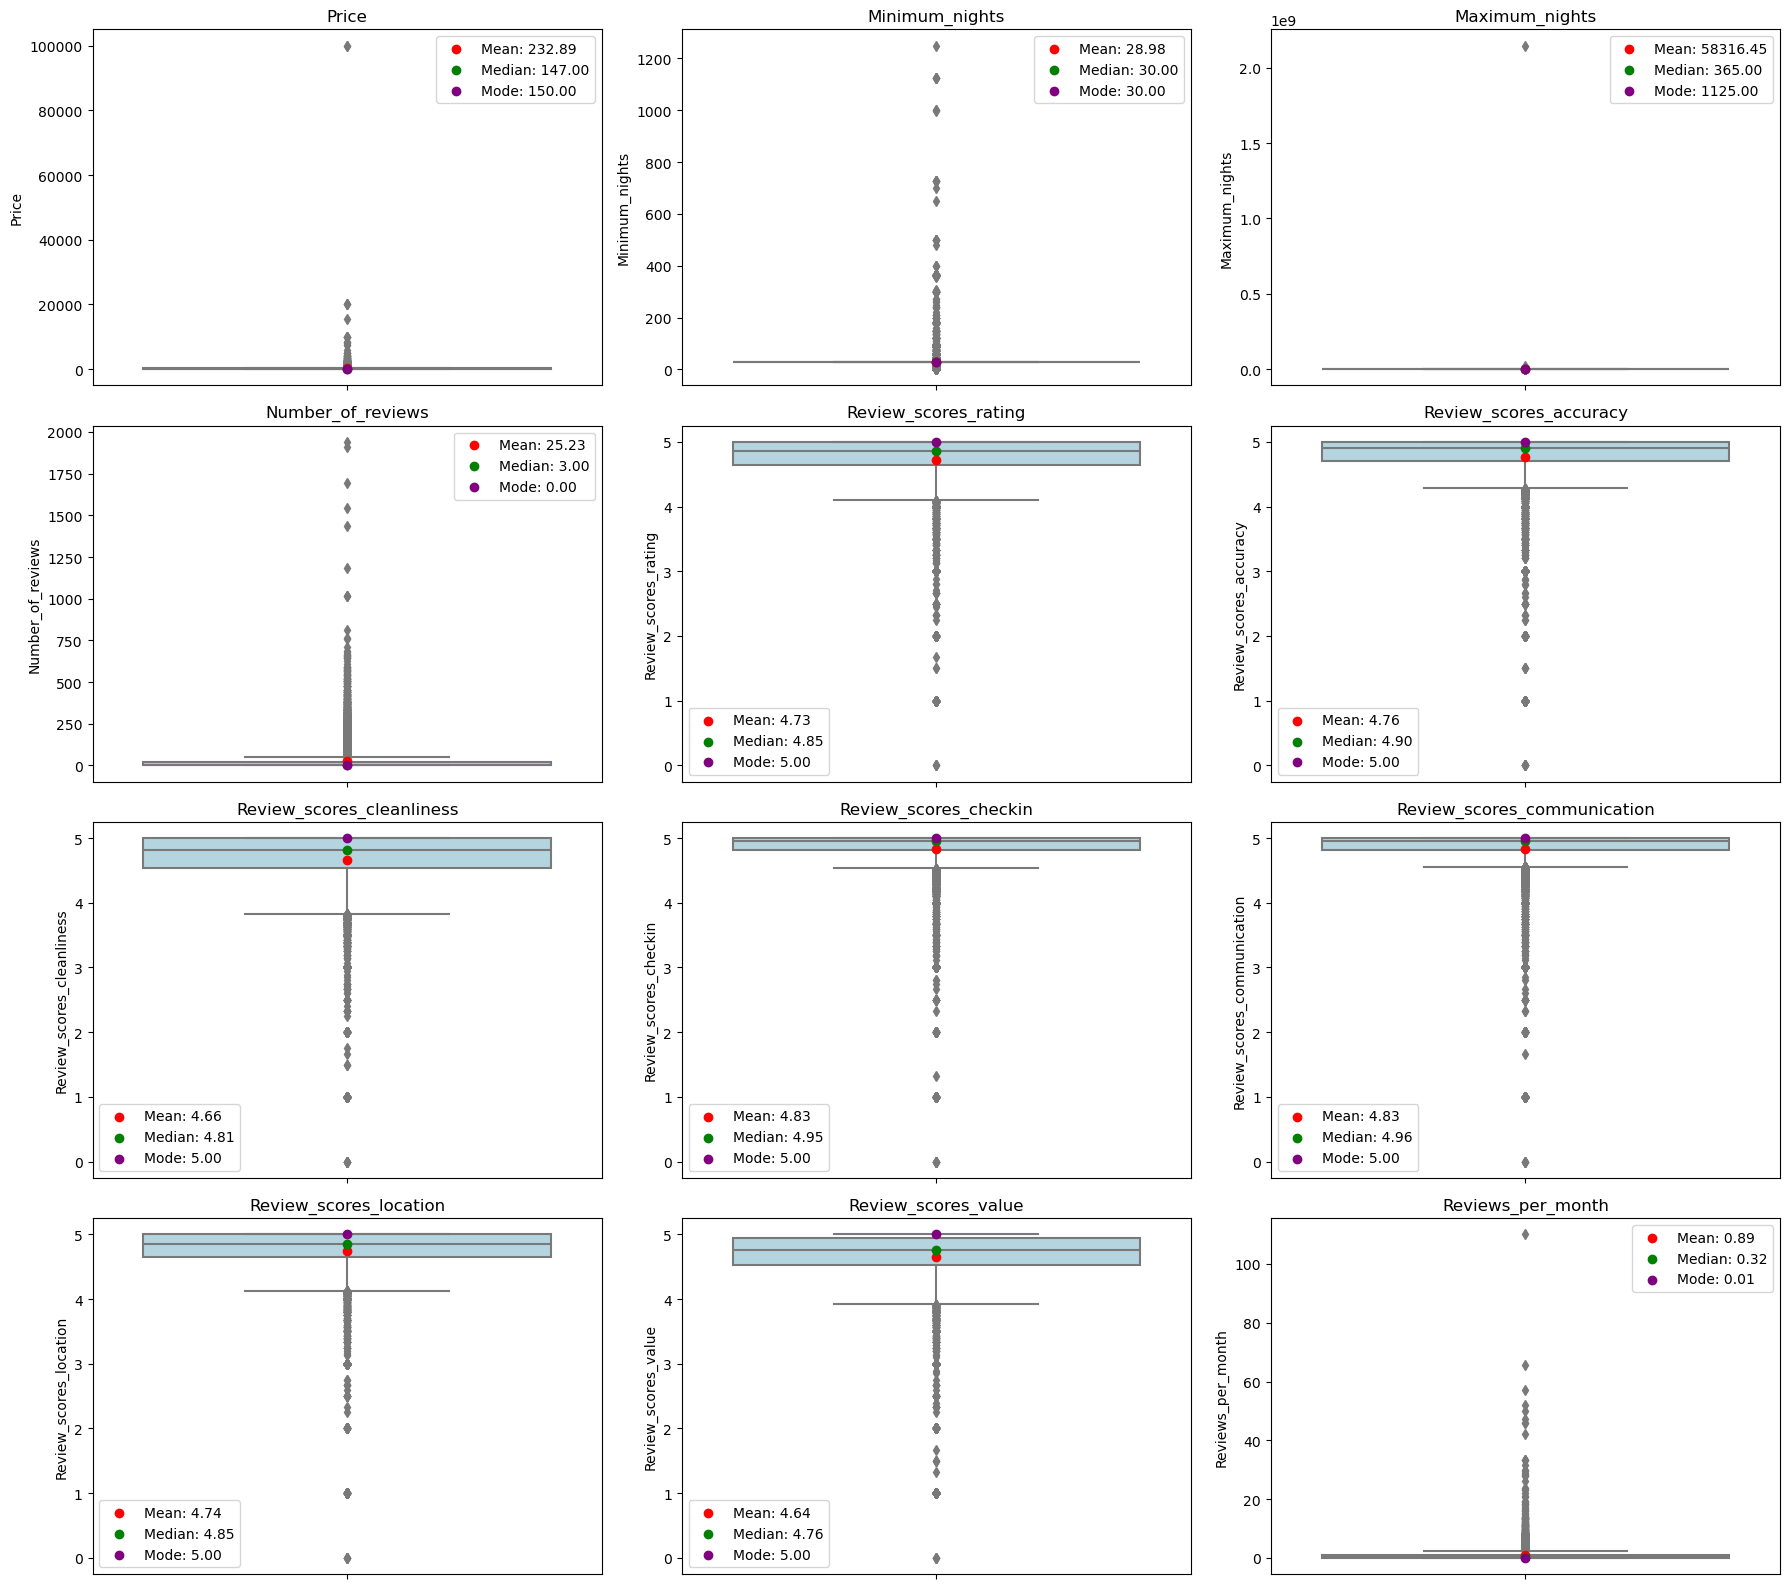

In [36]:
box_plot(listings, required_columns)

#### Box Plot Distribution - After removing the NaN values

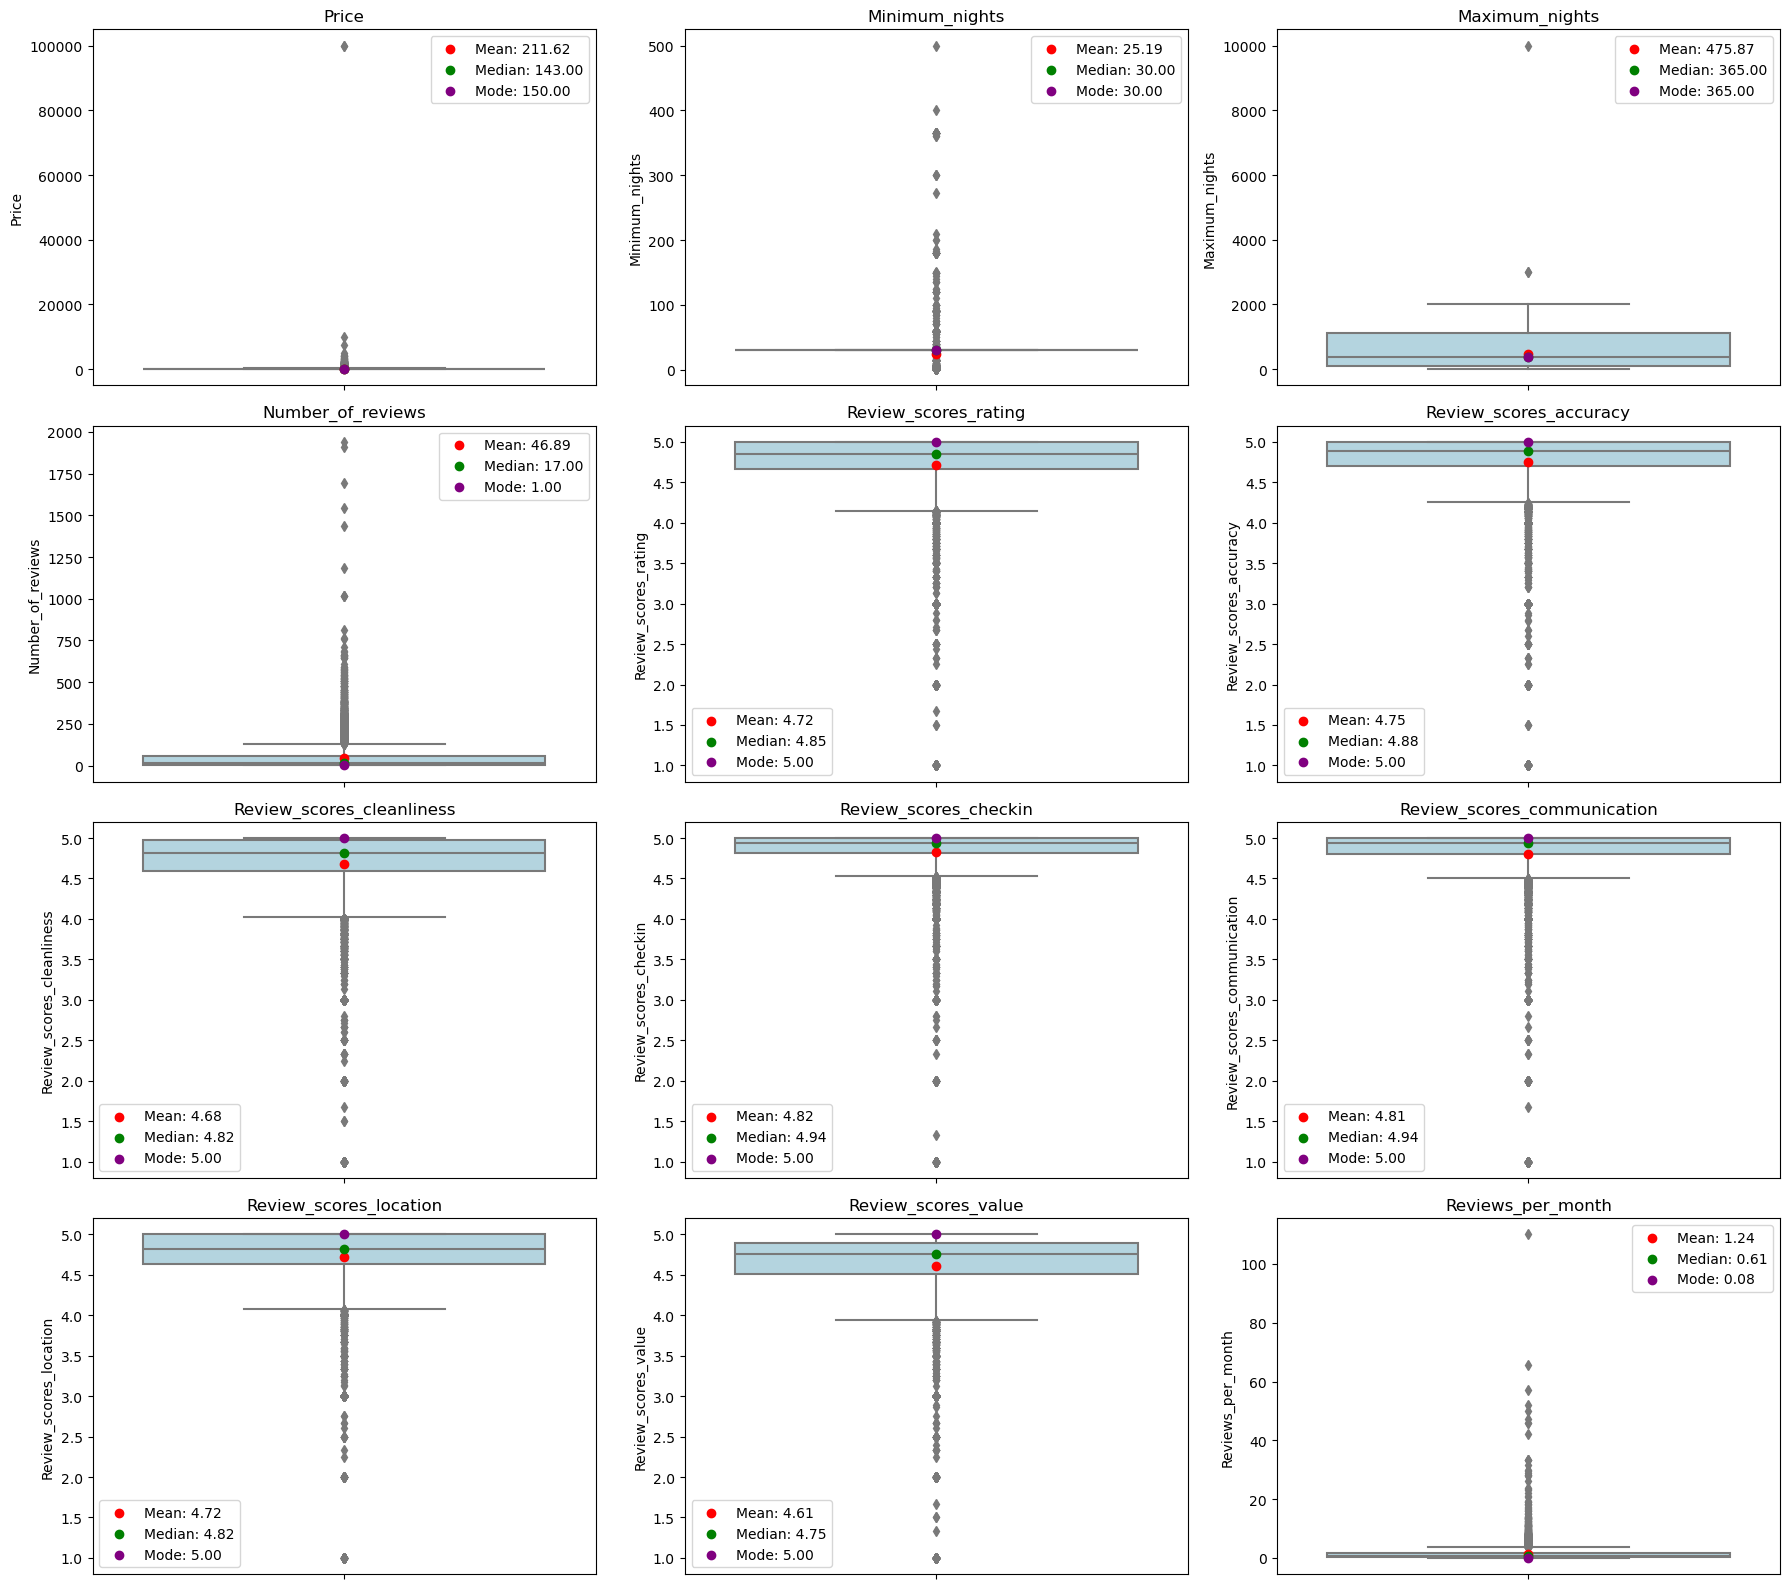

In [38]:
box_plot(not_null_listings, required_columns)

#### Dispersion

In [40]:
def violin_plot(df, columns):
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        col_data = df[column].dropna()
        variance = col_data.var()
        std_dev = col_data.std()
        data_range = col_data.max() - col_data.min()
        iqr = col_data.quantile(0.75) - col_data.quantile(0.25)
        
        sns.violinplot(y=col_data, ax=axes[i], color='lightblue')
        
        stats_text = (f'Variance: {variance:.2f}\n'
                      f'Std Dev: {std_dev:.2f}\n'
                      f'Range: {data_range:.2f}\n'
                      f'IQR: {iqr:.2f}')
        
        axes[i].set_title(f'{column.capitalize()}')
        axes[i].set_ylabel(column.capitalize())
        axes[i].text(0.65, 0.8, stats_text, transform=axes[i].transAxes, verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

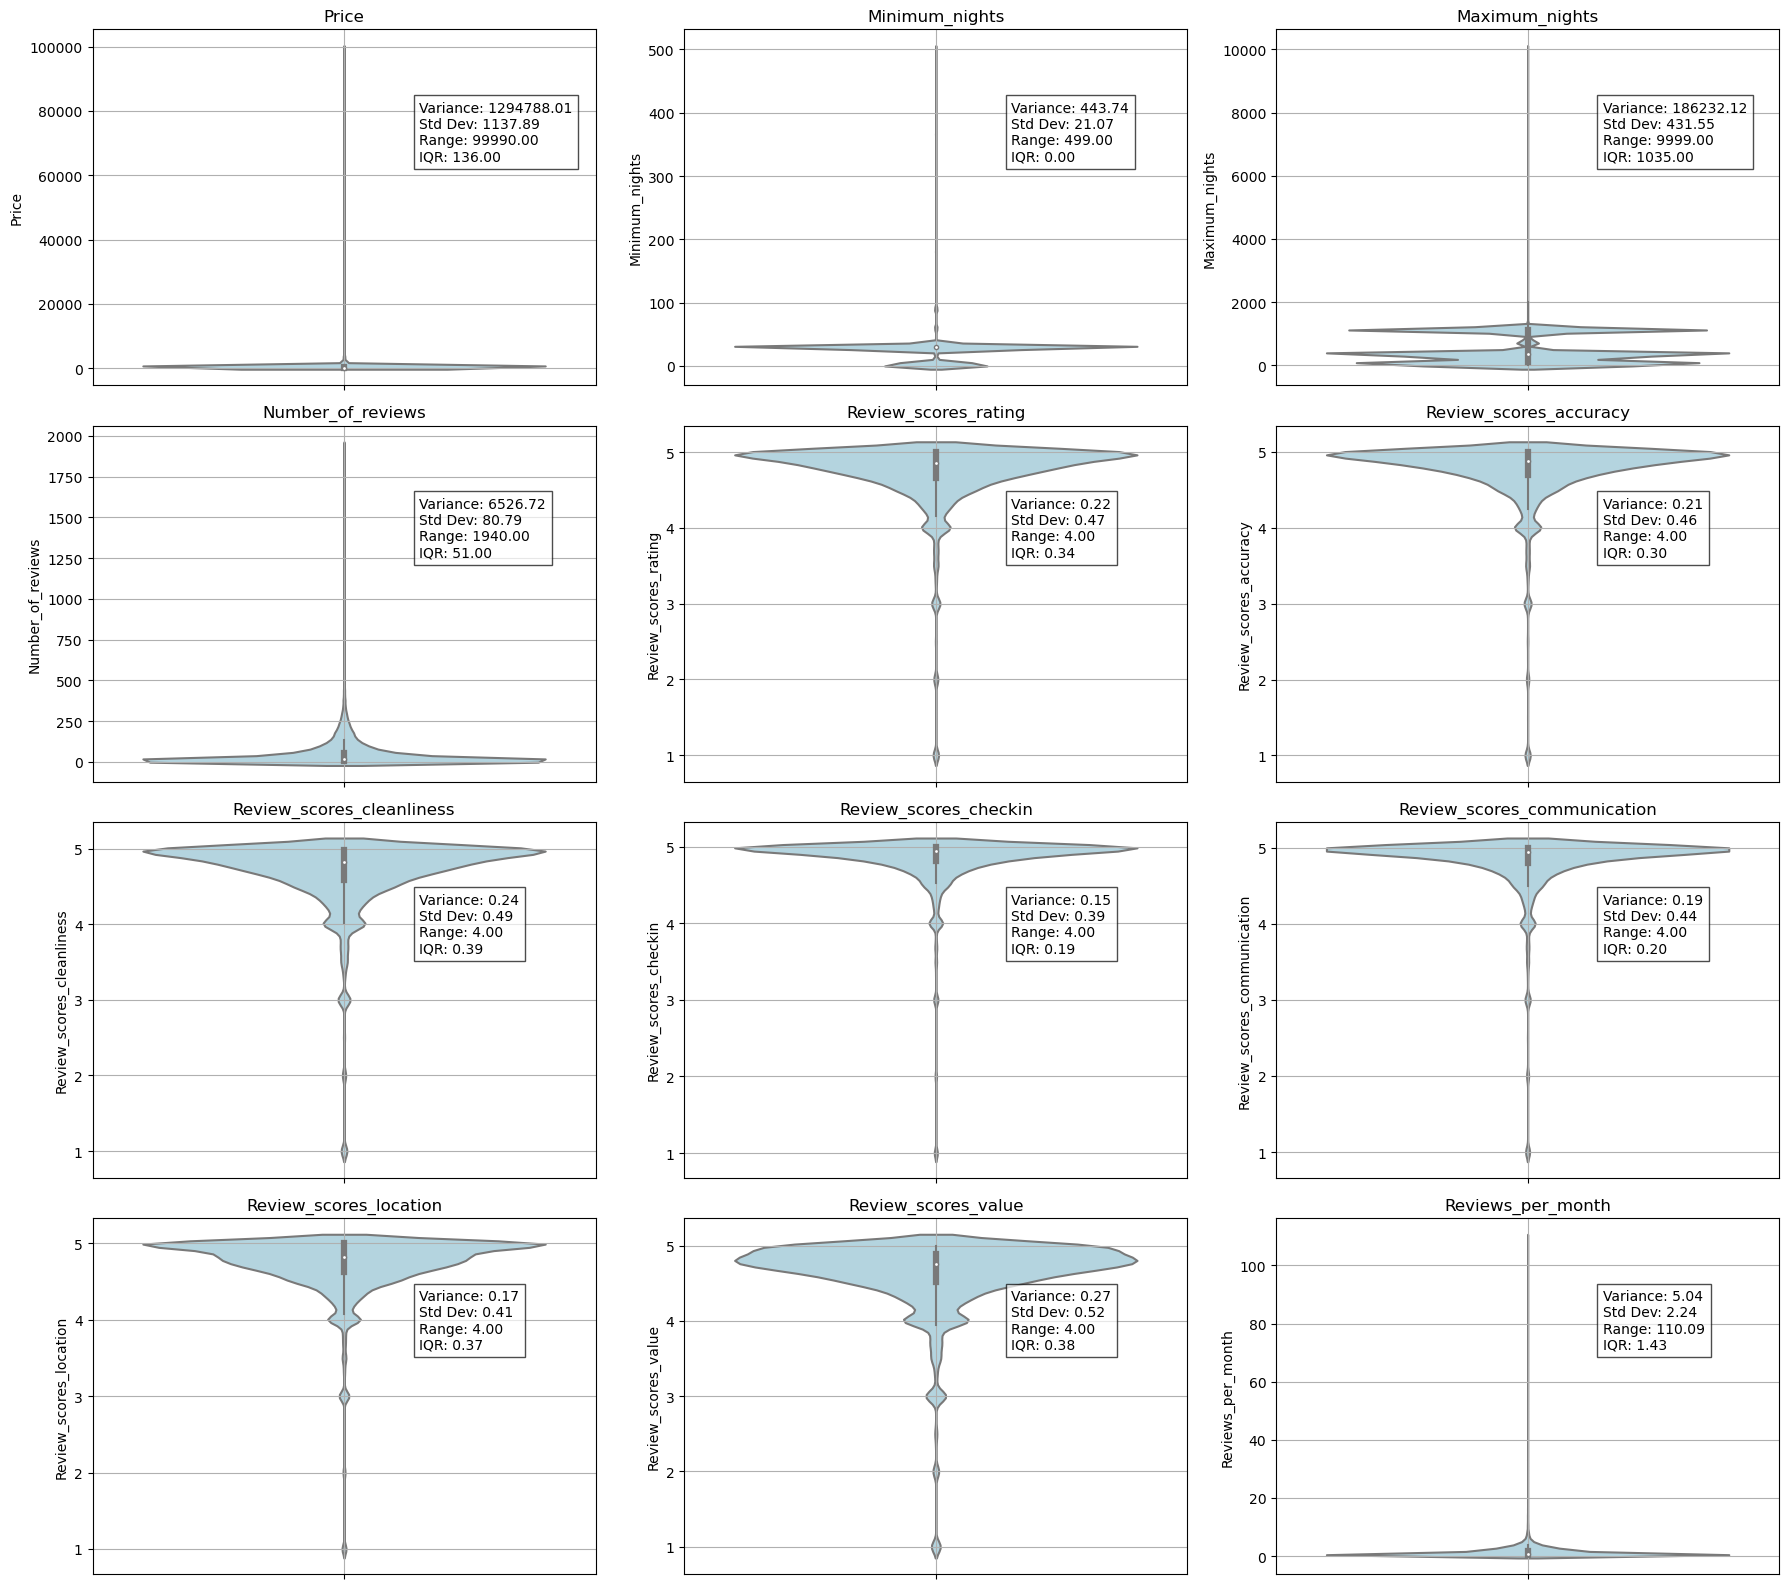

In [41]:
violin_plot(not_null_listings, required_columns)

#### Distribution

In [43]:
not_null_listings[required_columns].describe()

,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000,16101.000000
mean,211.621949,25.187131,475.869201,46.888640,4.718495,4.745582,4.679288,4.823073,4.806874,4.720238,4.609400,1.238469
std,1137.887521,21.065218,431.546191,80.788106,0.468620,0.458304,0.488581,0.390709,0.438721,0.407891,0.517952,2.244810
min,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,89.000000,30.000000,90.000000,4.000000,4.660000,4.700000,4.590000,4.810000,4.800000,4.630000,4.510000,0.210000
50%,143.000000,30.000000,365.000000,17.000000,4.850000,4.880000,4.820000,4.940000,4.940000,4.820000,4.750000,0.610000
75%,225.000000,30.000000,1125.000000,55.000000,5.000000,5.000000,4.980000,5.000000,5.000000,5.000000,4.890000,1.640000
max,100000.000000,500.000000,10000.000000,1941.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,110.100000


### Task 2 - Distribution Analysis
Plot histograms or density plots for key numerical features like `price`,
`minimum_nights`, and `review_scores_rating`. Analyze the distribution of
these features to identify any skewness or outliers.


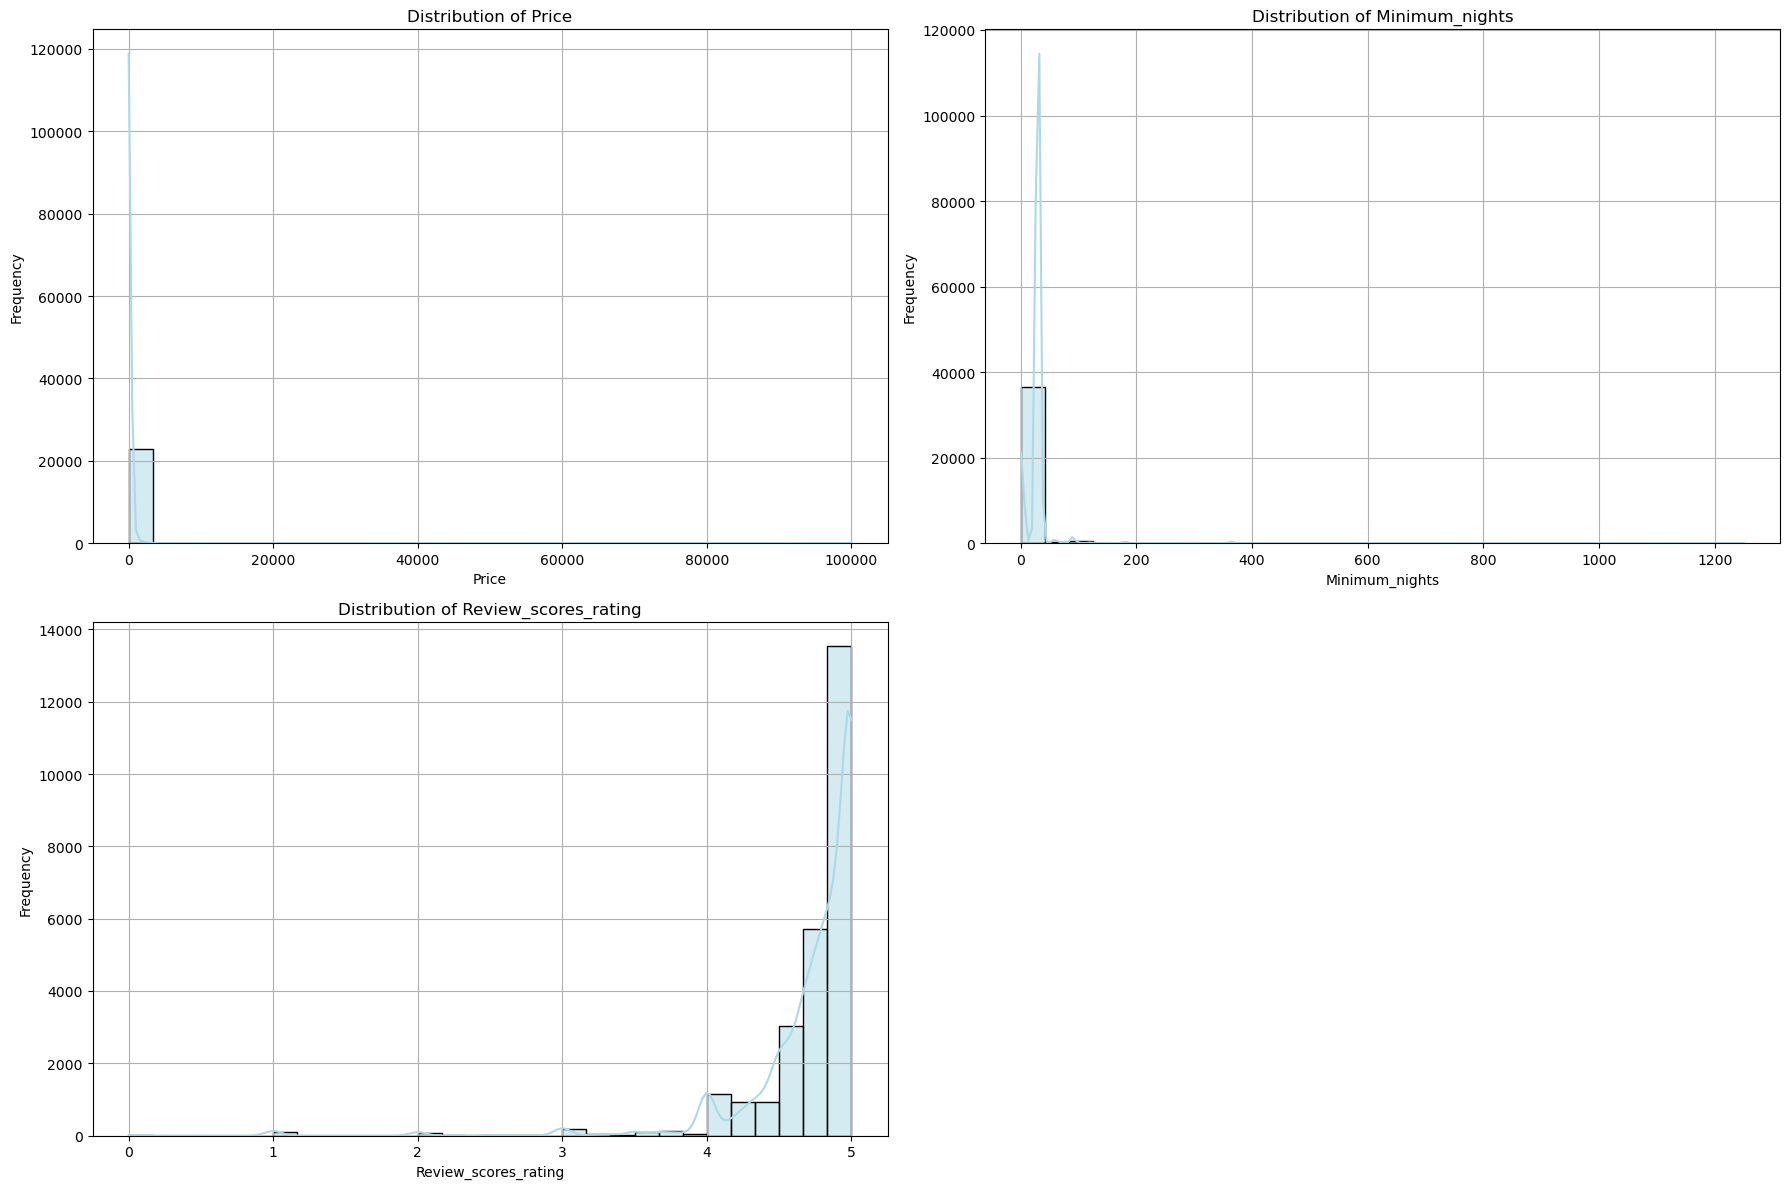

In [45]:
features = ['price', 'minimum_nights', 'review_scores_rating']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1) 
    sns.histplot(listings[feature], bins=30, kde=True, color='lightblue')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

#### Identifying skewness and outliers for the three attributes - price, minimum_ nights and review_scores_rating 

In [47]:
for feature in features:
    skewness = listings[feature].skew()
    print(f'Skewness of {feature}: {skewness}\n')

    Q1 = listings[feature].quantile(0.25)
    Q3 = listings[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_thresholds = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    print(outlier_thresholds)
    outliers = listings[(listings[feature] < outlier_thresholds[0]) | (listings[feature] > outlier_thresholds[1])]

    print(f'Number of outliers in {feature}: {len(outliers)}\n')
    print('\n---------------------------------------------------------------\n')

Skewness of price: 83.70202050880316

(-162.5, 497.5)
Number of outliers in price: 1771


---------------------------------------------------------------

Skewness of minimum_nights: 17.047789124634747

(30.0, 30.0)
Number of outliers in minimum_nights: 7406


---------------------------------------------------------------

Skewness of review_scores_rating: -4.392134181861305

(4.1, 5.540000000000001)
Number of outliers in review_scores_rating: 1755


---------------------------------------------------------------



#### Removing the outliers from the price column and plotting the histogram and the distribution graph

In [49]:
filter_price =  not_null_listings[not_null_listings['price'] <= 500]

In [50]:
def histogram_plot(before, after, column_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].hist(before[column_name], bins=5, color='blue', edgecolor='black')
    axes[0].set_title('Histogram before removing outliers')
    axes[0].set_xlabel(f'Values in {column_name}')
    axes[0].set_ylabel('Frequency')
    
    axes[1].hist(after[column_name], bins=5, color='green', edgecolor='black')
    axes[1].set_title('Histogram after removing outliers')
    axes[1].set_xlabel(f'Values in {column_name}')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

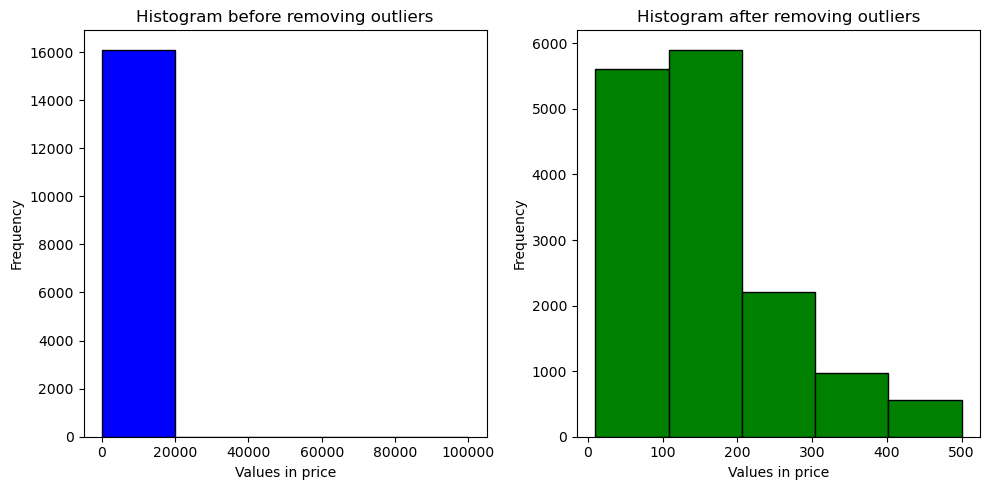

In [51]:
histogram_plot(not_null_listings, filter_price, 'price')

In [52]:
def density_plot(before, after, column_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    sns.kdeplot(before[column_name], ax=axes[0], color='blue', shade=True)
    axes[0].set_title('Distribution before removing outliers')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Density')
    
    sns.kdeplot(after[column_name], ax=axes[1], color='green', shade=True)
    axes[1].set_title('Distribution after removing outliers')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Density')
    
    plt.tight_layout()
    plt.show()

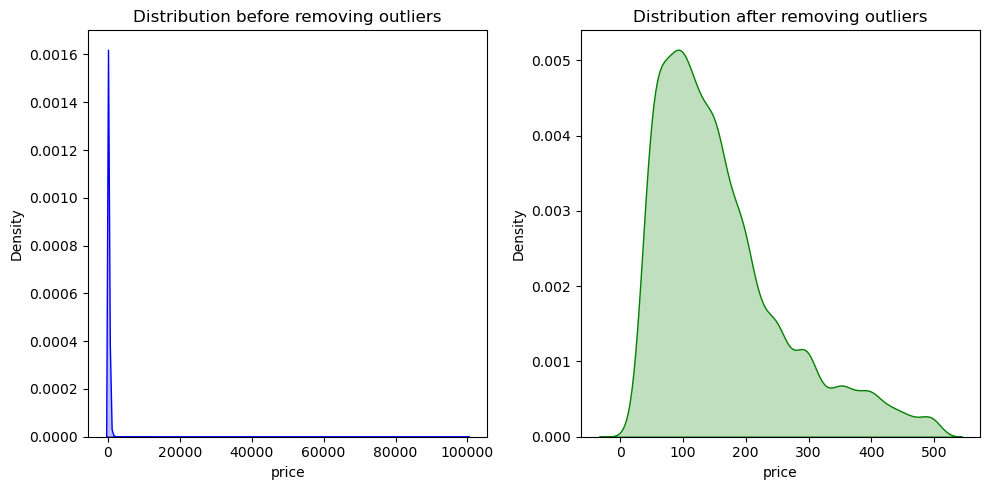

In [53]:
density_plot(not_null_listings, filter_price, 'price')

#### Removing the outliers from the minimum_nights column and plotting the histogram and the distribution graph

Since we are looking at tourist data and our target audience is tourists who stay for around 2 weeks to one month, we consider the normal range to be 14 days to 30 days.

In [56]:
filter_minimum_nights =  not_null_listings[not_null_listings['minimum_nights'] >= 14]
filter_minimum_nights =  filter_minimum_nights[filter_minimum_nights['minimum_nights'] <= 30]
filter_minimum_nights

,id,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,amenities,...,review_scores_rating,instant_bookable,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,572612125615500056,100%,t,Sunset Park,Brooklyn,40.639520,-74.014840,Private room in rental unit,Private room,"[""Single level home"", ""Cleaning products"", ""St...",...,4.83,t,0.21,6,4.83,4.67,5.00,4.83,4.67,4.67
8,13234457,100%,f,Bedford-Stuyvesant,Brooklyn,40.682750,-73.958140,Entire rental unit,Entire home/apt,"[""Kitchen"", ""Smoke alarm"", ""Hangers"", ""Carbon ...",...,4.00,f,0.02,2,5.00,3.00,5.00,2.00,5.00,5.00
11,773237631431486588,NaN,f,Bedford-Stuyvesant,Brooklyn,40.678090,-73.939710,Private room in rental unit,Private room,"[""Kitchen"", ""Dedicated workspace"", ""TV"", ""Exte...",...,5.00,f,0.06,1,5.00,5.00,5.00,5.00,4.00,5.00
13,760086536368275287,100%,f,Williamsburg,Brooklyn,40.713560,-73.941870,Entire condo,Entire home/apt,"[""Dishwasher"", ""Cleaning products"", ""Single le...",...,5.00,f,0.37,8,5.00,5.00,5.00,5.00,5.00,5.00
14,1189243425411300671,99%,f,Murray Hill,Manhattan,40.750251,-73.977745,Entire rental unit,Entire home/apt,"[""Dishwasher"", ""Kitchen"", ""Elevator"", ""TV"", ""S...",...,5.00,f,0.86,1,5.00,4.00,4.00,5.00,5.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37530,633168575271694958,100%,t,Flushing,Queens,40.750360,-73.806070,Entire guest suite,Entire home/apt,"[""Cleaning products"", ""Dining table"", ""Mini fr...",...,4.82,f,0.45,11,4.73,4.91,4.91,4.91,4.73,4.64
37532,1124574711796175408,100%,f,Canarsie,Brooklyn,40.642491,-73.896265,Entire rental unit,Entire home/apt,"[""Cleaning products"", ""Dining table"", ""TV"", ""S...",...,5.00,f,0.91,1,5.00,5.00,5.00,5.00,5.00,5.00
37533,32252006,NaN,f,Ditmars Steinway,Queens,40.772880,-73.898860,Entire rental unit,Entire home/apt,"[""Dishwasher"", ""Cleaning products"", ""Dining ta...",...,5.00,f,0.14,9,5.00,4.89,5.00,5.00,4.78,5.00
37535,704255897463350082,100%,t,Throgs Neck,Bronx,40.817370,-73.819710,Entire rental unit,Entire home/apt,"[""Cleaning products"", ""Clothing storage: close...",...,4.85,f,3.08,75,4.89,4.92,4.87,4.93,4.77,4.80


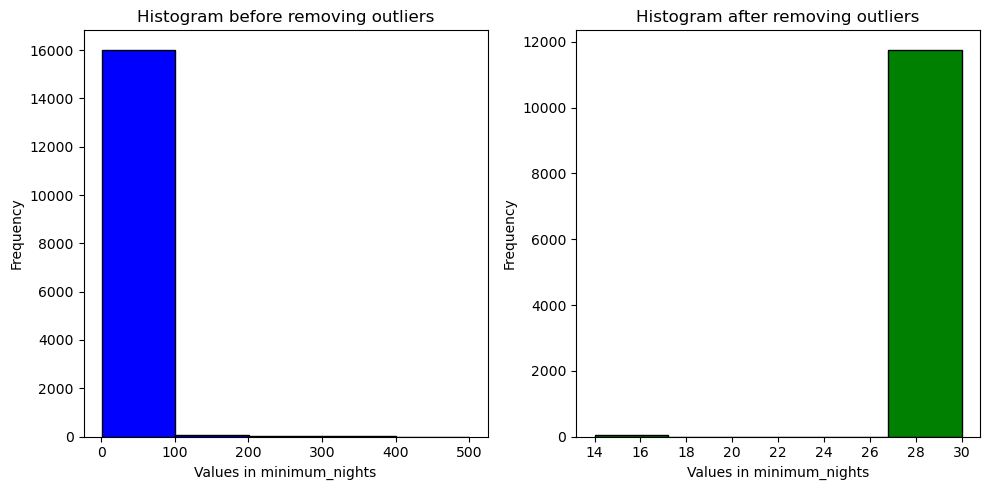

In [57]:
histogram_plot(not_null_listings, filter_minimum_nights, 'minimum_nights')

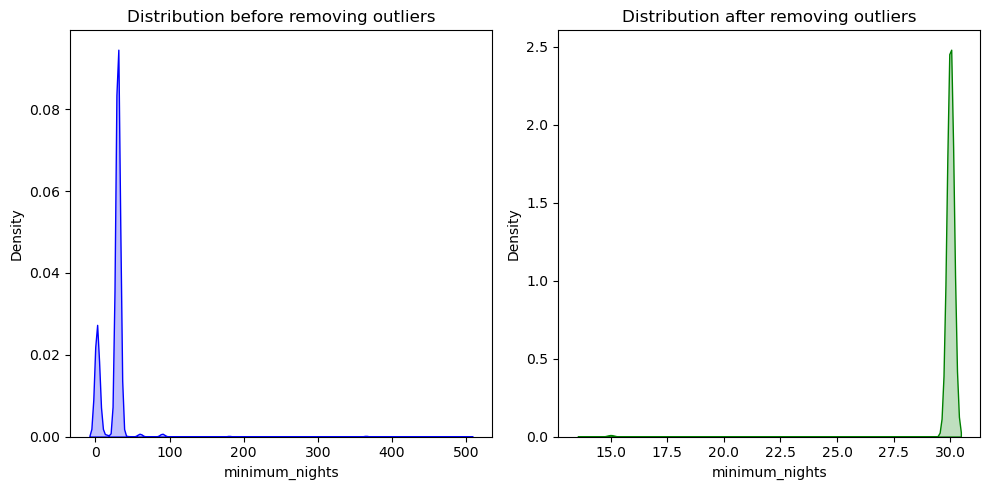

In [58]:
density_plot(not_null_listings, filter_minimum_nights, 'minimum_nights')

#### Removing the outliers from the review_scores_rating column and plotting the histogram and the distribution graph

In [60]:
filter_review_score = not_null_listings[not_null_listings['review_scores_rating'] >= 4]

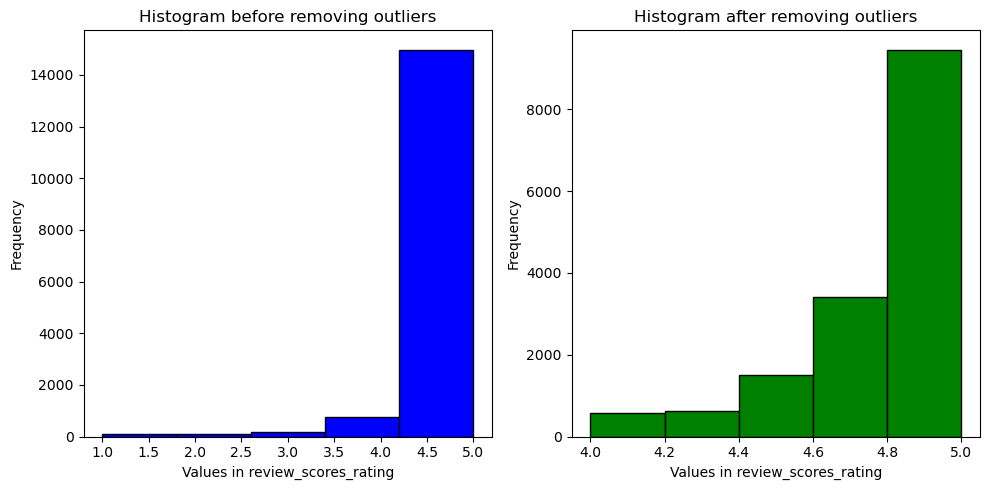

In [61]:
histogram_plot(not_null_listings, filter_review_score, 'review_scores_rating')

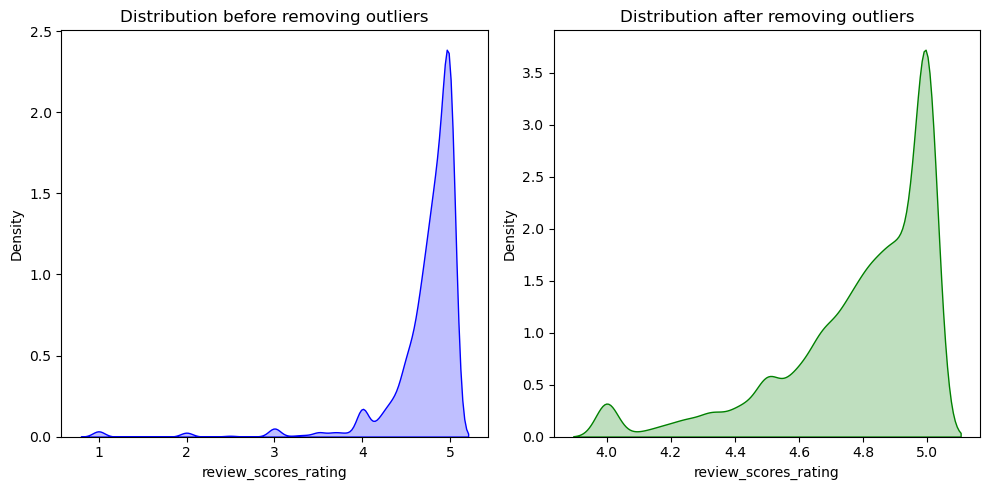

In [62]:
density_plot(not_null_listings, filter_review_score, 'review_scores_rating')

#### 3. Correlation Analysis
Create a correlation matrix to explore relationships between numerical
variables such as `price`, `number_of_reviews`, `availability_365`, and
`review_scores_rating`.
Identify any strong correlations that might be useful for predictive modeling
or further investigation.

In [64]:
columns_for_correlation = ['price', 'number_of_reviews', 'availability_365', 'review_scores_rating']

correlation_matrix = listings[columns_for_correlation].corr()

correlation_matrix

,price,number_of_reviews,availability_365,review_scores_rating
price,1.000000,-0.018415,0.025759,0.002246
number_of_reviews,-0.018415,1.000000,0.067912,0.054544
availability_365,0.025759,0.067912,1.000000,-0.067665
review_scores_rating,0.002246,0.054544,-0.067665,1.000000


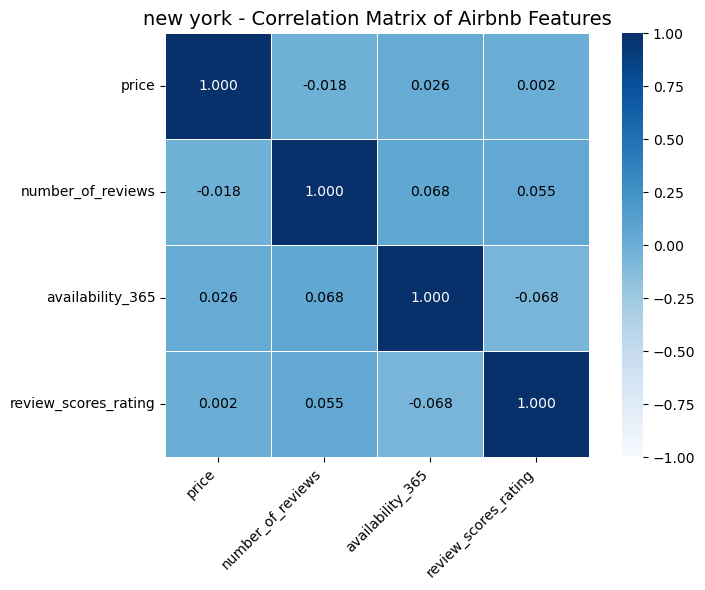

In [65]:
plt.figure(figsize=(8, 6))
    
ax = sns.heatmap(correlation_matrix, 
                     cmap='Blues', 
                     vmin=-1, vmax=1,
                     square=True,
                     linewidths=0.5)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = f"{correlation_matrix.iloc[i, j]:.3f}"
        ax.text(j + 0.5, i + 0.5, text,
                    ha="center", va="center", 
                    color="black" if abs(correlation_matrix.iloc[i, j]) < 0.7 else "white",
                    fontsize=10)

plt.title(f"{city} - Correlation Matrix of Airbnb Features", fontsize=14)
    
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
    
plt.tight_layout()
plt.show()

#### Converting some of the categorical values such as room_type, amenities, instant_bookable, host_is_superhost, neighbourhood_group_cleansed into numerical values to find correlation

In [67]:
category_list = listings['room_type'].unique()
category_list

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [68]:
listings_copy = listings[:]

#### Converting room_type categorical values into numerical values and adding a new attribute room_type_numerical

In [70]:
listings_copy['room_type_numerical'] = pd.factorize(listings_copy['room_type'])[0]

category_mapping = dict(enumerate(pd.factorize(listings_copy['room_type'])[1]))

category_mapping

{0: 'Private room', 1: 'Entire home/apt', 2: 'Shared room', 3: 'Hotel room'}

#### Analyzing the feasibility of converting property_type into a numerical column

Since we have already encoded for room_type which is just a broader categorization of property_type, we do not perform encoding for this attribute

In [72]:
category_property_type = listings['property_type'].unique()
category_property_type

array(['Private room in rental unit', 'Entire rental unit', 'Entire home',
       'Room in hotel', 'Entire condo', 'Entire townhouse',
       'Private room in home', 'Private room in townhouse',
       'Private room in condo', 'Entire serviced apartment',
       'Shared room in rental unit', 'Entire loft', 'Boat',
       'Entire vacation home', 'Camper/RV', 'Entire guesthouse',
       'Shared room in condo', 'Room in serviced apartment',
       'Private room in bed and breakfast',
       'Private room in serviced apartment',
       'Private room in guest suite', 'Shared room in home',
       'Entire guest suite', 'Private room in loft', 'Entire place',
       'Private room in villa', 'Entire cottage',
       'Room in boutique hotel', 'Private room in farm stay',
       'Private room in lighthouse', 'Shared room in vacation home',
       'Private room in hostel', 'Entire home/apt',
       'Private room in train', 'Shared room in loft',
       'Private room in bungalow', 'Private room in

#### Converting amenities into a categorical value by calculating the number of amenities

In [74]:
def count_elements(text):
    if pd.isnull(text): 
        return 0
    return len(str(text).split(','))  

listings_copy['amenities_count'] = listings_copy['amenities'].apply(count_elements)
listings_copy['amenities_count']

0         6
1        40
2        16
3         6
4        10
         ..
37536     6
37537    55
37538    34
37539    56
37540    11
Name: amenities_count, Length: 37541, dtype: int64

#### Converting neighbourhood_group categorical values into numerical values and adding a new attribute neighbolurhood_group_numerical

In [76]:
listings_copy['neighbourhood_group_numerical'] = pd.factorize(listings_copy['neighbourhood_group_cleansed'])[0]

category_mapping = dict(enumerate(pd.factorize(listings_copy['neighbourhood_group_cleansed'])[1]))

f'Category to number mapping: {category_mapping}'

"Category to number mapping: {0: 'Brooklyn', 1: 'Bronx', 2: 'Manhattan', 3: 'Queens', 4: 'Staten Island'}"

#### Converting host_is_superhost categorical values into numerical values and adding a new attribute host_is_superhost_numerical

In [78]:
listings_copy['host_is_superhost_numeric'] = listings_copy['host_is_superhost'].map({'t': 1, 'f': 0})
listings_copy[['host_is_superhost', 'host_is_superhost_numeric']].head()

,host_is_superhost,host_is_superhost_numeric
0,f,0.0
1,t,1.0
2,f,0.0
3,f,0.0
4,f,0.0


#### Converting instant_bookable categorical values into numerical values and adding a new attribute instant_bookable_numeric

In [80]:
listings_copy['instant_bookable_numeric'] = listings_copy['instant_bookable'].map({'t': 1, 'f': 0})
listings_copy[['instant_bookable', 'instant_bookable_numeric']].head()

,instant_bookable,instant_bookable_numeric
0,f,0
1,t,1
2,f,0
3,f,0
4,f,0


#### Plotting heatmap for correlation for additional variables

In [82]:
columns_for_correlation = ['price', 'number_of_reviews', 'availability_365', 'review_scores_rating',
                           'room_type_numerical', 'amenities_count', 'neighbourhood_group_numerical', 
                           'host_is_superhost_numeric', 'instant_bookable_numeric']

correlation_matrix = listings_copy[columns_for_correlation].corr()

correlation_matrix

,price,number_of_reviews,availability_365,review_scores_rating,room_type_numerical,amenities_count,neighbourhood_group_numerical,host_is_superhost_numeric,instant_bookable_numeric
price,1.000000,-0.018415,0.025759,0.002246,0.063253,0.020740,0.009934,-0.015866,0.052031
number_of_reviews,-0.018415,1.000000,0.067912,0.054544,-0.034532,0.240130,-0.030493,0.262610,0.032043
availability_365,0.025759,0.067912,1.000000,-0.067665,0.079908,0.261650,0.061447,0.165013,0.129990
review_scores_rating,0.002246,0.054544,-0.067665,1.000000,0.017950,0.156682,-0.053357,0.180363,-0.098481
room_type_numerical,0.063253,-0.034532,0.079908,0.017950,1.000000,0.134189,0.053462,-0.017299,0.123471
amenities_count,0.020740,0.240130,0.261650,0.156682,0.134189,1.000000,-0.020140,0.377289,0.046805
neighbourhood_group_numerical,0.009934,-0.030493,0.061447,-0.053357,0.053462,-0.020140,1.000000,-0.018495,0.074462
host_is_superhost_numeric,-0.015866,0.262610,0.165013,0.180363,-0.017299,0.377289,-0.018495,1.000000,-0.002152
instant_bookable_numeric,0.052031,0.032043,0.129990,-0.098481,0.123471,0.046805,0.074462,-0.002152,1.000000


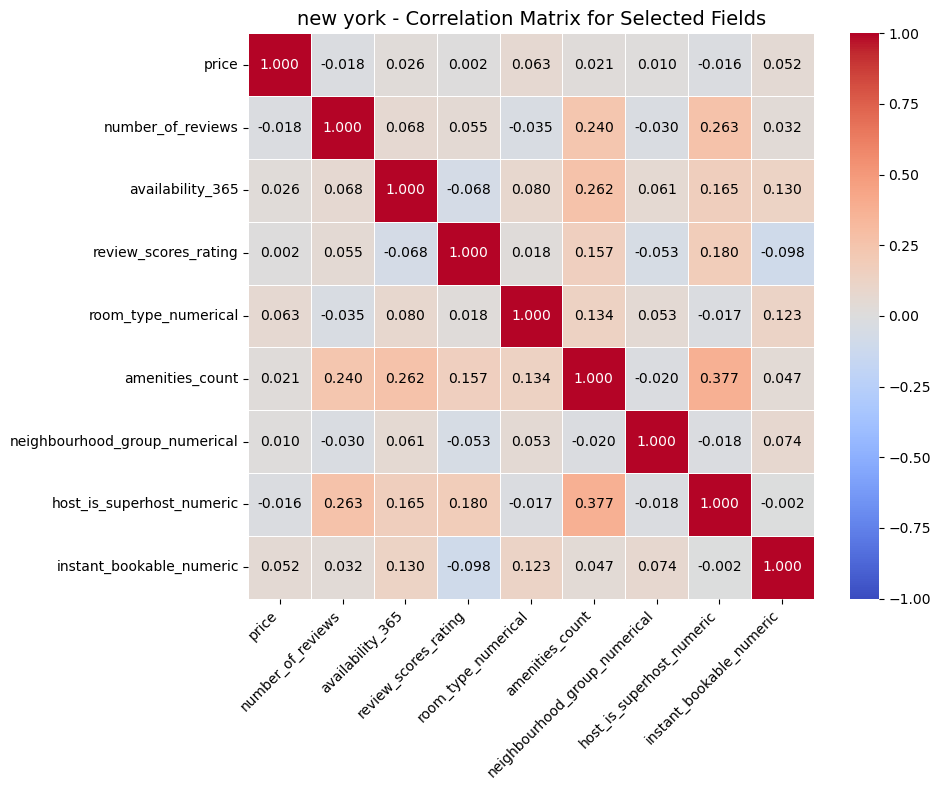

In [83]:
plt.figure(figsize=(10, 8))
    
ax = sns.heatmap(correlation_matrix, 
                     cmap='coolwarm', 
                     vmin=-1, vmax=1,
                     square=True,
                     linewidths=0.5)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = f"{correlation_matrix.iloc[i, j]:.3f}"
        ax.text(j + 0.5, i + 0.5, text,
                    ha="center", va="center", 
                    color="black" if abs(correlation_matrix.iloc[i, j]) < 0.7 else "white",
                    fontsize=10)

plt.title(f"{city} - Correlation Matrix for Selected Fields", fontsize=14)
    
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
    
plt.tight_layout()
plt.show()

#### 4. Price Analysis
Analyze the distribution of prices across different neighborhoods
(`host_neighbourhood`) or room types (if available). Understand which
neighborhoods have higher or lower average prices and whether certain
neighborhoods are more popular for shortterm or longterm stays.

#### 4.1 We group the listings based on neighbourhood groups and calculate the mean price for each neighbourhood

In [86]:
price_not_null_listings = listings.dropna(subset=['price'])

In [87]:
grouped_neighbourhoods = price_not_null_listings.groupby('neighbourhood_group_cleansed', as_index=False)['price'].mean()
grouped_neighbourhoods

,neighbourhood_group_cleansed,price
0,Bronx,120.912301
1,Brooklyn,194.813464
2,Manhattan,313.666733
3,Queens,130.194981
4,Staten Island,129.876972


#### We plot the function to plot the bar graph for the distribution of price based on different factors

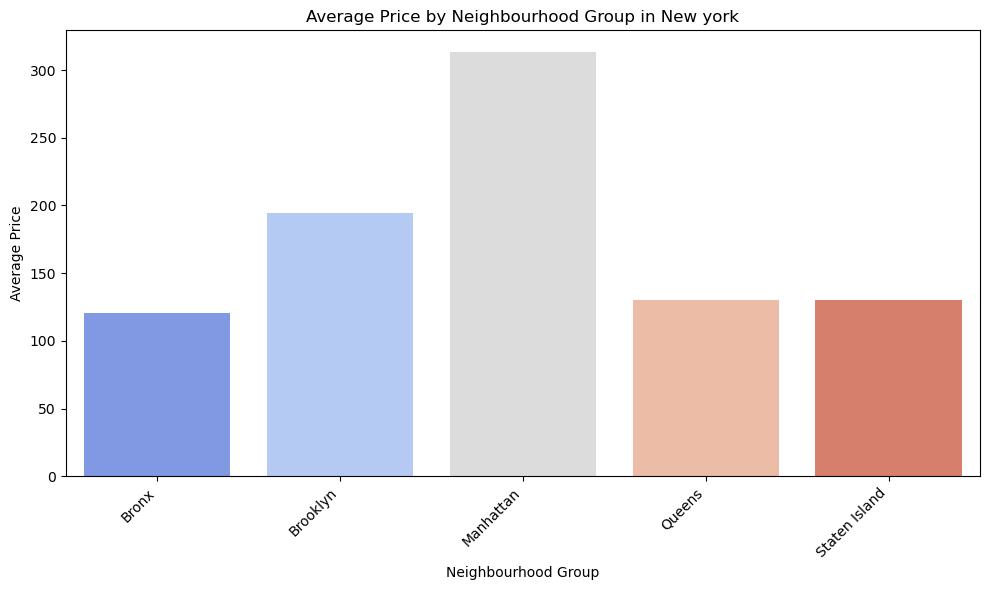

In [89]:
def plot_bargraph(df, axis, label):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=axis, y='price', data=df, palette='coolwarm')
    
    plt.xlabel(label)
    plt.ylabel('Average Price')
    plt.title(f'Average Price by {label} in {city.capitalize()}')
    
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    

plot_bargraph(grouped_neighbourhoods, 'neighbourhood_group_cleansed', 'Neighbourhood Group')

In [90]:
grouped_neighbourhoods.isnull().sum()

neighbourhood_group_cleansed    0
price                           0
dtype: int64

In [91]:
price_not_null_listings_room_type = listings_copy.dropna(subset=['price'])
price_not_null_listings_room_type

,id,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,amenities,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,room_type_numerical,amenities_count,neighbourhood_group_numerical,host_is_superhost_numeric,instant_bookable_numeric
0,739333866230665371,NaN,f,Fort Hamilton,Brooklyn,40.614310,-74.034440,Private room in rental unit,Private room,"[""Kitchen"", ""Dedicated workspace"", ""TV"", ""Smok...",...,NaN,NaN,NaN,NaN,NaN,0,6,0,0.0,0
1,572612125615500056,100%,t,Sunset Park,Brooklyn,40.639520,-74.014840,Private room in rental unit,Private room,"[""Single level home"", ""Cleaning products"", ""St...",...,4.67,5.00,4.83,4.67,4.67,0,40,0,1.0,1
2,45267941,100%,f,Morris Heights,Bronx,40.850030,-73.922810,Private room in rental unit,Private room,"[""Kitchen"", ""Hair dryer"", ""Hot water"", ""Dryer""...",...,NaN,NaN,NaN,NaN,NaN,0,16,1,0.0,0
3,838141198693830649,0%,f,East Harlem,Manhattan,40.798718,-73.940093,Entire rental unit,Entire home/apt,"[""Building staff"", ""Elevator"", ""Dedicated work...",...,NaN,NaN,NaN,NaN,NaN,1,6,2,0.0,0
4,1082660771919357919,78%,f,South Slope,Brooklyn,40.668012,-73.985226,Entire home,Entire home/apt,"[""BBQ grill"", ""Kitchen"", ""Dedicated workspace""...",...,NaN,NaN,NaN,NaN,NaN,1,10,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37535,704255897463350082,100%,t,Throgs Neck,Bronx,40.817370,-73.819710,Entire rental unit,Entire home/apt,"[""Cleaning products"", ""Clothing storage: close...",...,4.92,4.87,4.93,4.77,4.80,1,51,1,1.0,0
37536,943355797386691170,100%,NaN,Jamaica,Queens,40.676080,-73.796300,Private room in home,Private room,"[""Free street parking"", ""Hot water"", ""Dining t...",...,4.20,3.80,4.20,3.80,3.80,0,6,3,NaN,1
37537,783387491435863626,100%,t,East Elmhurst,Queens,40.766890,-73.871270,Entire rental unit,Entire home/apt,"[""Mosquito net"", ""Cleaning products"", ""Clothin...",...,4.84,4.85,4.89,4.78,4.77,1,55,3,1.0,0
37538,45834849,92%,f,East Elmhurst,Queens,40.762120,-73.873150,Private room in home,Private room,"[""Dishwasher"", ""Cleaning products"", ""Dining ta...",...,4.39,4.58,4.60,4.40,4.30,0,34,3,0.0,0


#### 4.2 We group the listings based on room_type and calculate the mean price for each neighbourhood

In [93]:
room_types_grouped = price_not_null_listings_room_type.groupby('room_type_numerical', as_index=False)['price'].mean()
room_types_grouped

,room_type_numerical,price
0,0,155.378863
1,1,289.980760
2,2,99.954167
3,3,452.208861


#### Plotting the bar graph for price distribution based on room_type

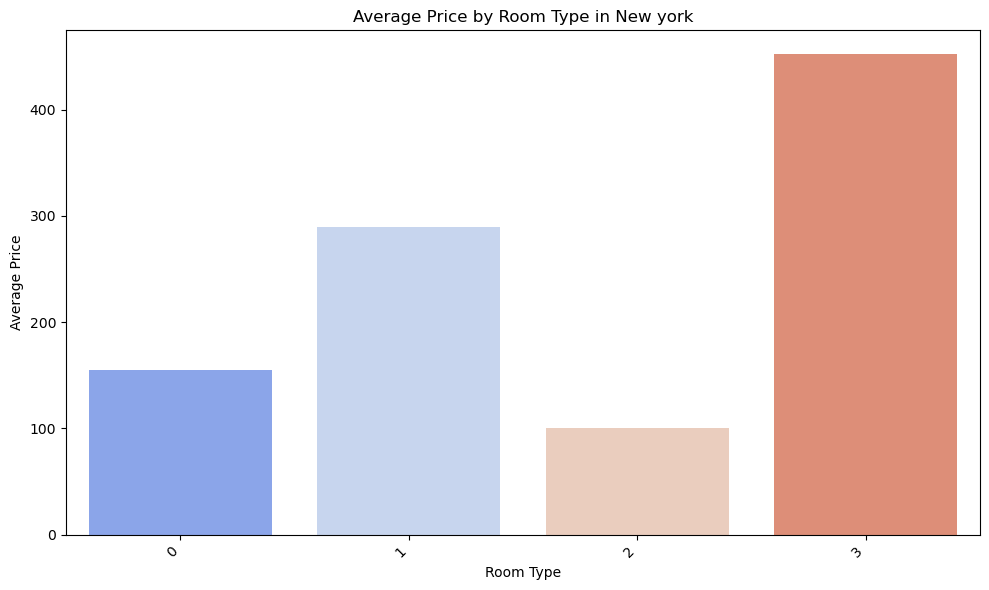

In [95]:
plot_bargraph(room_types_grouped, 'room_type_numerical', 'Room Type')

#### Plotting heatmap for price based on latitude and longitude

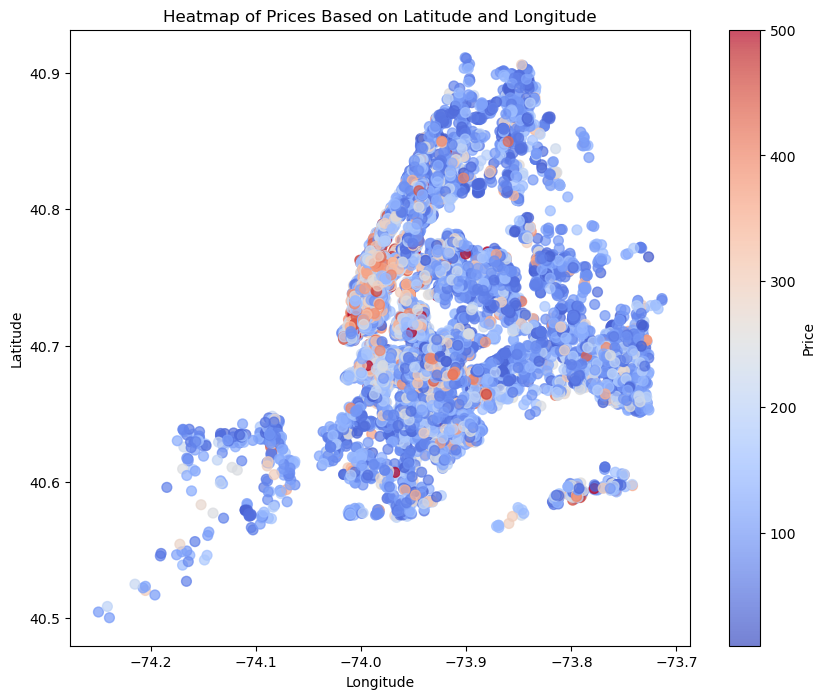

In [97]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(
    x=filter_price['longitude'], 
    y=filter_price['latitude'], 
    c=filter_price['price'],
    cmap='coolwarm',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='Price')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Prices Based on Latitude and Longitude')

plt.show()

#### 4.1 We group the listings based on neighbourhood_groups and calculate the mean minimum_nights for each neighbourhood

In [99]:
price_not_null_listings['minimum_nights'].describe()

count    22790.000000
mean        26.644932
std         21.706727
min          1.000000
25%         30.000000
50%         30.000000
75%         30.000000
max        500.000000
Name: minimum_nights, dtype: float64

In [100]:
grouped_neighbourhoods = price_not_null_listings.groupby('neighbourhood_group_cleansed', as_index=False)['minimum_nights'].mean()
grouped_neighbourhoods

,neighbourhood_group_cleansed,minimum_nights
0,Bronx,27.235763
1,Brooklyn,27.079353
2,Manhattan,26.205564
3,Queens,26.618864
4,Staten Island,28.223975


#### We categorize the stays as Short term, Medium term and Long Term based on duration

In [102]:
def categorize_stay(nights):
    if nights <= 30: return 'Short Term'
    elif nights > 90: return 'Long Term'
    else: return 'Medium Term'

price_not_null_listings['stay_type'] = price_not_null_listings['minimum_nights'].apply(categorize_stay)

grouped_stay_type = price_not_null_listings.groupby(['neighbourhood_group_cleansed', 'stay_type'], as_index=False).size()

pivoted_stay_type = grouped_stay_type.pivot(index='neighbourhood_group_cleansed', columns='stay_type', values='size').fillna(0)

pivoted_stay_type['Predominant Stay Type'] = pivoted_stay_type[['Short Term', 'Long Term']].idxmax(axis=1)

pivoted_stay_type

stay_type,Long Term,Medium Term,Short Term,Predominant Stay Type
neighbourhood_group_cleansed,,,,
Bronx,6,14,858,Short Term
Brooklyn,30,299,7648,Short Term
Manhattan,84,1006,8902,Short Term
Queens,14,92,3520,Short Term
Staten Island,3,4,310,Short Term


#### Inorder to express it as a relative value we convert it into percentage. 

In [104]:
pivoted_stay_type = grouped_stay_type.pivot(index='neighbourhood_group_cleansed', columns='stay_type', values='size').fillna(0)

pivoted_stay_type['Total Stays'] = pivoted_stay_type.sum(axis=1)

pivoted_stay_type['Short Term %'] = (pivoted_stay_type['Short Term'] / pivoted_stay_type['Total Stays']) * 100
pivoted_stay_type['Medium Term %'] = (pivoted_stay_type['Medium Term'] / pivoted_stay_type['Total Stays']) * 100
pivoted_stay_type['Long Term %'] = (pivoted_stay_type['Long Term'] / pivoted_stay_type['Total Stays']) * 100

pivoted_stay_type_percentage = pivoted_stay_type[['Short Term %', 'Medium Term %', 'Long Term %']]

pivoted_stay_type_percentage['Predominant Stay Type'] = pivoted_stay_type_percentage[['Short Term %', 'Medium Term %', 'Long Term %']].idxmax(axis=1)

pivoted_stay_type_percentage

stay_type,Short Term %,Medium Term %,Long Term %,Predominant Stay Type
neighbourhood_group_cleansed,,,,
Bronx,97.722096,1.594533,0.683371,Short Term %
Brooklyn,95.875642,3.748276,0.376081,Short Term %
Manhattan,89.091273,10.068054,0.840673,Short Term %
Queens,97.076669,2.537231,0.386100,Short Term %
Staten Island,97.791798,1.261830,0.946372,Short Term %


### 5. Neighborhood Comparison
Compare the average `review_scores_rating` across different
neighborhoods. Determine if certain neighborhoods have consistently higher
ratings, which could indicate better or worse guest experiences.

#### We plot a heatmap of the `review_scores_rating` based on the **Latitude and the Longitude**

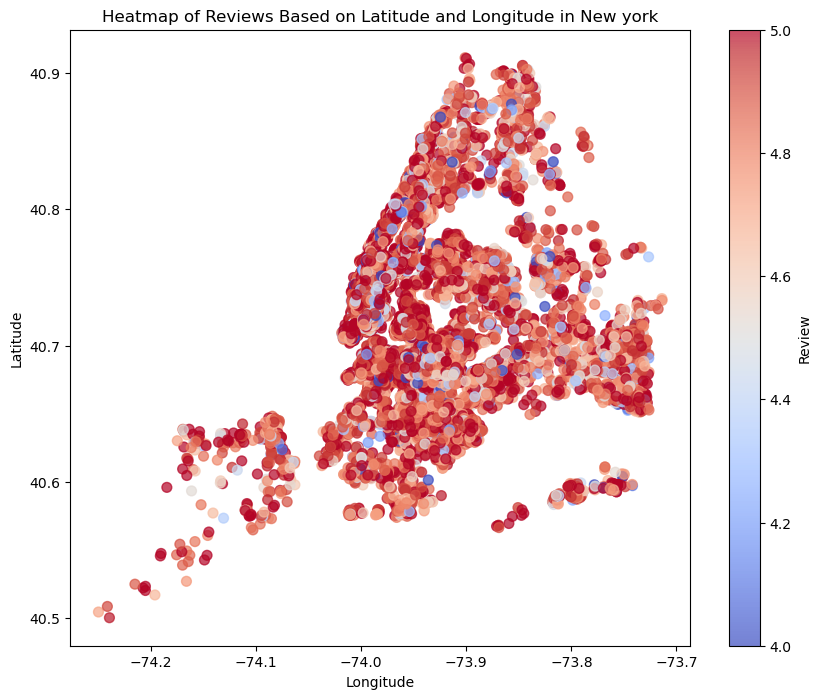

In [107]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(
    x=filter_review_score['longitude'], 
    y=filter_review_score['latitude'], 
    c=filter_review_score['review_scores_rating'],
    cmap='coolwarm',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='Review')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Heatmap of Reviews Based on Latitude and Longitude in {city.capitalize()}')

plt.show()

#### We grouped the listings based on the neighbourhood group and calculated the average rating for each of the neighbourhoods

In [109]:
grouped_neighbourhoods_reviews = listings.groupby('neighbourhood_group_cleansed', as_index=False)['review_scores_rating'].mean()
grouped_neighbourhoods_reviews

,neighbourhood_group_cleansed,review_scores_rating
0,Bronx,4.705484
1,Brooklyn,4.764638
2,Manhattan,4.685158
3,Queens,4.729416
4,Staten Island,4.800782


In [110]:
def categorize_review(rating):
    if rating > 4.75:
        return 'Top Review'
    elif rating < 3:
        return 'Low Review'
    else:
        return 'Good Review'

price_not_null_listings['review_category'] = price_not_null_listings['review_scores_rating'].apply(categorize_review)

review_counts = price_not_null_listings.groupby('neighbourhood_group_cleansed')['review_category'].value_counts(normalize=True).unstack(fill_value=0)

review_counts_percentage = review_counts * 100

review_counts_percentage

review_category,Good Review,Low Review,Top Review
neighbourhood_group_cleansed,,,
Bronx,50.227790,1.025057,48.747153
Brooklyn,47.260875,0.702018,52.037107
Manhattan,62.520016,0.910729,36.569255
Queens,48.814120,0.744622,50.441258
Staten Island,41.324921,0.000000,58.675079


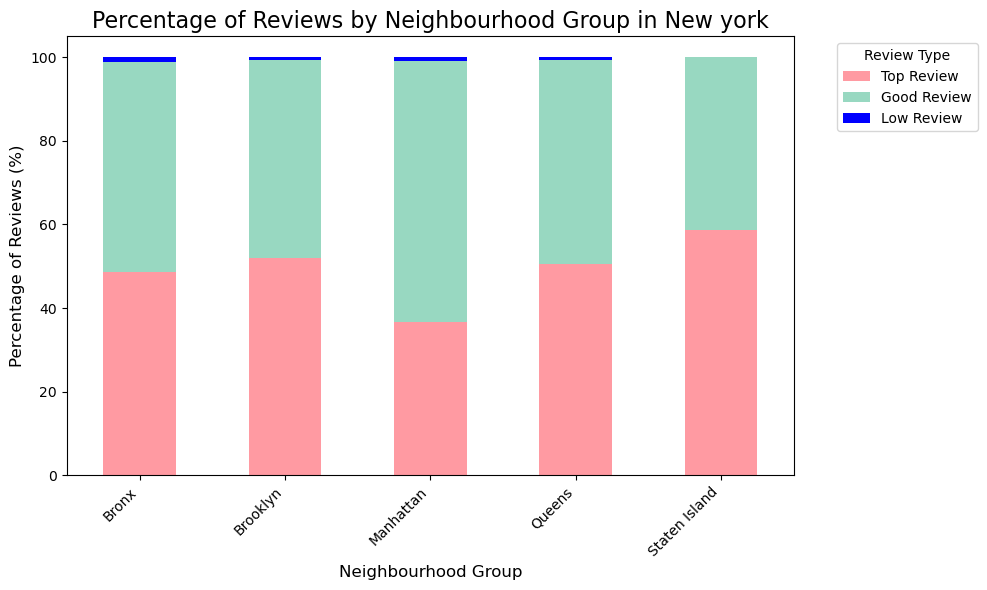

In [111]:
sorted_columns = review_counts_percentage.sort_values(by=review_counts_percentage.index[-1], axis=1, ascending=False).columns

darker_pastel_colors = ['#FF9AA2', '#98D8C1', 'blue']

review_counts_percentage[sorted_columns].plot(kind='bar', stacked=True, figsize=(10, 6), color=darker_pastel_colors)

plt.title(f'Percentage of Reviews by Neighbourhood Group in {city.capitalize()}', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Percentage of Reviews (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Review Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 7. Text Length: Create a new feature that measures the length of each
review (number of words or characters). Determine if the length of a review
correlates with its sentiment or the review score.


In [113]:
city = 'new york'
reviews = pd.read_csv(f'data/{city}/reviews.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947328 entries, 0 to 947327
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     947328 non-null  int64 
 1   id             947328 non-null  int64 
 2   date           947328 non-null  object
 3   reviewer_id    947328 non-null  int64 
 4   reviewer_name  947325 non-null  object
 5   comments       947094 non-null  object
dtypes: int64(3), object(3)
memory usage: 43.4+ MB


##### preprocessing the comments on the review

In [115]:
# Dropping the null values
reviews = reviews.dropna(subset=['comments'])
reviews['comments'] = reviews['comments'].astype('string')

##### Creating functions for preprocessing the comments (Removing HTML Tags, Special Characters and converting the text to lower so that all text data are standard)

In [117]:
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def count_word(sentence):
     return len(sentence.split(" "))

def get_sentiment(sentence):
    analysis = TextBlob(sentence)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 1
    elif polarity == 0:
        return 0
    else:
        return -1

In [118]:
reviews['cleaned_comments'] = reviews['comments'].apply(preprocess_text)
reviews['number_of_words'] = reviews['cleaned_comments'].apply(count_word)
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments,number_of_words
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits. <br/>Nous avons a...,notre sjour de trois nuits nous avons apprcier...,121
1,2595,19176,2009-12-05,53267,Cate,Great experience.,great experience,2
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...,ive stayed with my friend at the midtown castl...,89
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en...",weve been staying here for about 9 nights enjo...,63
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...,we had a wonderful stay at jennifers charming ...,24
...,...,...,...,...,...,...,...,...
947323,1202281404451653124,1210187339508573604,2024-07-27,336561829,Eli,Nice comfy place to get some rest,nice comfy place to get some rest,7
947324,1202281439306897980,1212447511379103143,2024-07-30,562140003,Mert,It located in a great area that really close t...,it located in a great area that really close t...,29
947325,1202281541998087802,1208820196573552796,2024-07-25,38066548,Jonny,"Works for a single night, however place felt a...",works for a single night however place felt a ...,19
947326,1202281541998087802,1214515290122107417,2024-08-02,593375750,Agim,Rip off,rip off,2


##### Convert the data into chunks so that it is easier to do the do the sentiment analysis using the textblob

In [120]:
def process_chunk(chunk):
    chunk['sentiment'] = chunk['cleaned_comments'].apply(get_sentiment)
    return chunk

chunk_size = 1_00_000
chunks = [reviews[i:i + chunk_size] for i in range(0, reviews.shape[0], chunk_size)]

processed_chunks = []
for chunk in chunks:
    processed_chunk = process_chunk(chunk)
    processed_chunks.append(processed_chunk)

final_reviews = pd.concat(processed_chunks, ignore_index=True)

final_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments,number_of_words,sentiment
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits. <br/>Nous avons a...,notre sjour de trois nuits nous avons apprcier...,121,0
1,2595,19176,2009-12-05,53267,Cate,Great experience.,great experience,2,1
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...,ive stayed with my friend at the midtown castl...,89,1
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en...",weve been staying here for about 9 nights enjo...,63,1
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...,we had a wonderful stay at jennifers charming ...,24,1


##### Total count of positive, negative and neutral reviews

In [122]:
# Netural Review
(final_reviews['sentiment'] == 0).sum()

84424

In [123]:
# Negative Review
(final_reviews['sentiment'] < 0).sum()

13929

In [124]:
# Positive Review
(final_reviews['sentiment'] > 0).sum()

848741

##### Removing all the neutral comments from the dataframe

In [126]:
final_reviews = final_reviews[final_reviews['sentiment'] != 0]

##### Calculating the correaltion between the number of words in the reviews and the associated sentiment

In [128]:
columns_for_correlation = ['number_of_words', 'sentiment']

correlation_matrix = final_reviews[columns_for_correlation].corr()

correlation_matrix

,number_of_words,sentiment
number_of_words,1.000000,-0.065618
sentiment,-0.065618,1.000000


In [129]:
grouped_df = final_reviews.groupby('listing_id', as_index=False)['number_of_words'].sum()
grouped_df

,listing_id,number_of_words
0,2595,2899
1,5136,498
2,6848,11040
3,6872,51
4,6990,18079
...,...,...
25688,1217534324731996615,12
25689,1218891471303123283,2287
25690,1219100207830329728,50
25691,1219761487691460780,16


##### Merging the reviews dataframe and the listing dataframe

In [131]:
merged = pd.merge(
    grouped_df[['number_of_words', 'listing_id']],
    listings[['review_scores_rating', 'id']],
    left_on='listing_id',
    right_on='id',
    how='inner'
)
merged

,number_of_words,listing_id,review_scores_rating,id
0,2899,2595,4.68,2595
1,498,5136,4.75,5136
2,11040,6848,4.58,6848
3,51,6872,5.00,6872
4,18079,6990,4.88,6990
...,...,...,...,...
25688,12,1217534324731996615,5.00,1217534324731996615
25689,2287,1218891471303123283,4.60,1218891471303123283
25690,50,1219100207830329728,5.00,1219100207830329728
25691,16,1219761487691460780,5.00,1219761487691460780


##### Calculating the correlation between the number of words and the review score rating

In [133]:
columns_for_correlation = ['number_of_words', 'review_scores_rating']

correlation_matrix = merged[columns_for_correlation].corr()

correlation_matrix

,number_of_words,review_scores_rating
number_of_words,1.000000,0.059647
review_scores_rating,0.059647,1.000000


In [134]:
final_reviews[final_reviews['sentiment'] > 0]['number_of_words'].mean()

45.863391776761105

In [135]:
final_reviews[final_reviews['sentiment'] < 0]['number_of_words'].mean()

70.25953047598536

#### 8. Keyword Extraction
Identify and count the occurrence of specific keywords (e.g., "clean,"
"comfortable," "noisy") in the reviews. Generate new features based on the
presence of these keywords, which might influence guest satisfaction.

##### Using the `sentiment` field to categorize the word is positive or negative 

In [138]:
positive_reviews = final_reviews[final_reviews['sentiment'] == 1]

In [139]:
negative_reviews = final_reviews[final_reviews['sentiment'] == -1]

In [140]:
def wordcloud(df):
    all_comments = ' '.join(df['cleaned_comments'])

    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_comments)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title('Word Cloud of Reviews')
    plt.show()

##### Generating the word cloud for the positive reviews and negative reviews

In [246]:
wordcloud(positive_reviews)


KeyboardInterrupt



In [ ]:
wordcloud(negative_reviews)

In [238]:
positive_words = ['loved', 'spacious', 'great', 'responsive', 'love', 'enjoy', 'perfect', 'clean', 'comfortable', 'recommend', 'kind']
negative_words = ['noise', 'little', 'broken', 'disappointed', 'leave', 'rude', 'unhelpful', 'expensive', 'overpriced', 'outdated', 'cramped']

df = pd.merge(
    final_reviews[['number_of_words', 'listing_id', 'sentiment']],
    listings[['review_scores_rating', 'id', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                'review_scores_communication', 'review_scores_location', 'review_scores_value']],
    left_on='listing_id',
    right_on='id',
    how='inner'
)

df['positive_count'] = final_reviews['cleaned_comments'].apply(lambda x: sum([1 for kw in positive_words if kw in x.lower()]))
df['negative_count'] = final_reviews['cleaned_comments'].apply(lambda x: sum([1 for kw in negative_words if kw in x.lower()]))
df.head()

,number_of_words,listing_id,sentiment,review_scores_rating,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,positive_count,negative_count
0,2,2595,1,4.68,2595,4.68,4.73,4.63,4.77,4.8,4.81,4.4,NaN,NaN
1,89,2595,1,4.68,2595,4.68,4.73,4.63,4.77,4.8,4.81,4.4,1.0,0.0
2,63,2595,1,4.68,2595,4.68,4.73,4.63,4.77,4.8,4.81,4.4,4.0,0.0
3,24,2595,1,4.68,2595,4.68,4.73,4.63,4.77,4.8,4.81,4.4,1.0,1.0
4,98,2595,1,4.68,2595,4.68,4.73,4.63,4.77,4.8,4.81,4.4,1.0,0.0


In [239]:
correlation_matrix = df.corr()

correlation_matrix

,number_of_words,listing_id,sentiment,review_scores_rating,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,positive_count,negative_count
number_of_words,1.000000,-0.053344,-0.065618,0.016994,-0.053344,0.016994,0.017376,-0.002317,0.020584,0.029388,-0.003114,0.018474,0.010338,0.002656
listing_id,-0.053344,1.000000,-0.024000,-0.026469,1.000000,-0.026469,-0.097507,0.003512,-0.104260,-0.071396,-0.071828,-0.114910,-0.026776,-0.004485
sentiment,-0.065618,-0.024000,1.000000,0.121562,-0.024000,0.121562,0.117968,0.088402,0.105721,0.115924,0.061484,0.115433,0.003541,0.001182
review_scores_rating,0.016994,-0.026469,0.121562,1.000000,-0.026469,1.000000,0.868476,0.785771,0.726750,0.762750,0.420564,0.850336,0.001195,-0.002077
id,-0.053344,1.000000,-0.024000,-0.026469,1.000000,-0.026469,-0.097507,0.003512,-0.104260,-0.071396,-0.071828,-0.114910,-0.026776,-0.004485
review_scores_rating,0.016994,-0.026469,0.121562,1.000000,-0.026469,1.000000,0.868476,0.785771,0.726750,0.762750,0.420564,0.850336,0.001195,-0.002077
review_scores_accuracy,0.017376,-0.097507,0.117968,0.868476,-0.097507,0.868476,1.000000,0.713296,0.714242,0.732099,0.373663,0.830238,0.004955,-0.000946
review_scores_cleanliness,-0.002317,0.003512,0.088402,0.785771,0.003512,0.785771,0.713296,1.000000,0.556331,0.540357,0.282266,0.684138,-0.003681,-0.001951
review_scores_checkin,0.020584,-0.104260,0.105721,0.726750,-0.104260,0.726750,0.714242,0.556331,1.000000,0.763957,0.340463,0.680976,0.005712,-0.001162
review_scores_communication,0.029388,-0.071396,0.115924,0.762750,-0.071396,0.762750,0.732099,0.540357,0.763957,1.000000,0.331441,0.715341,0.008030,-0.000416


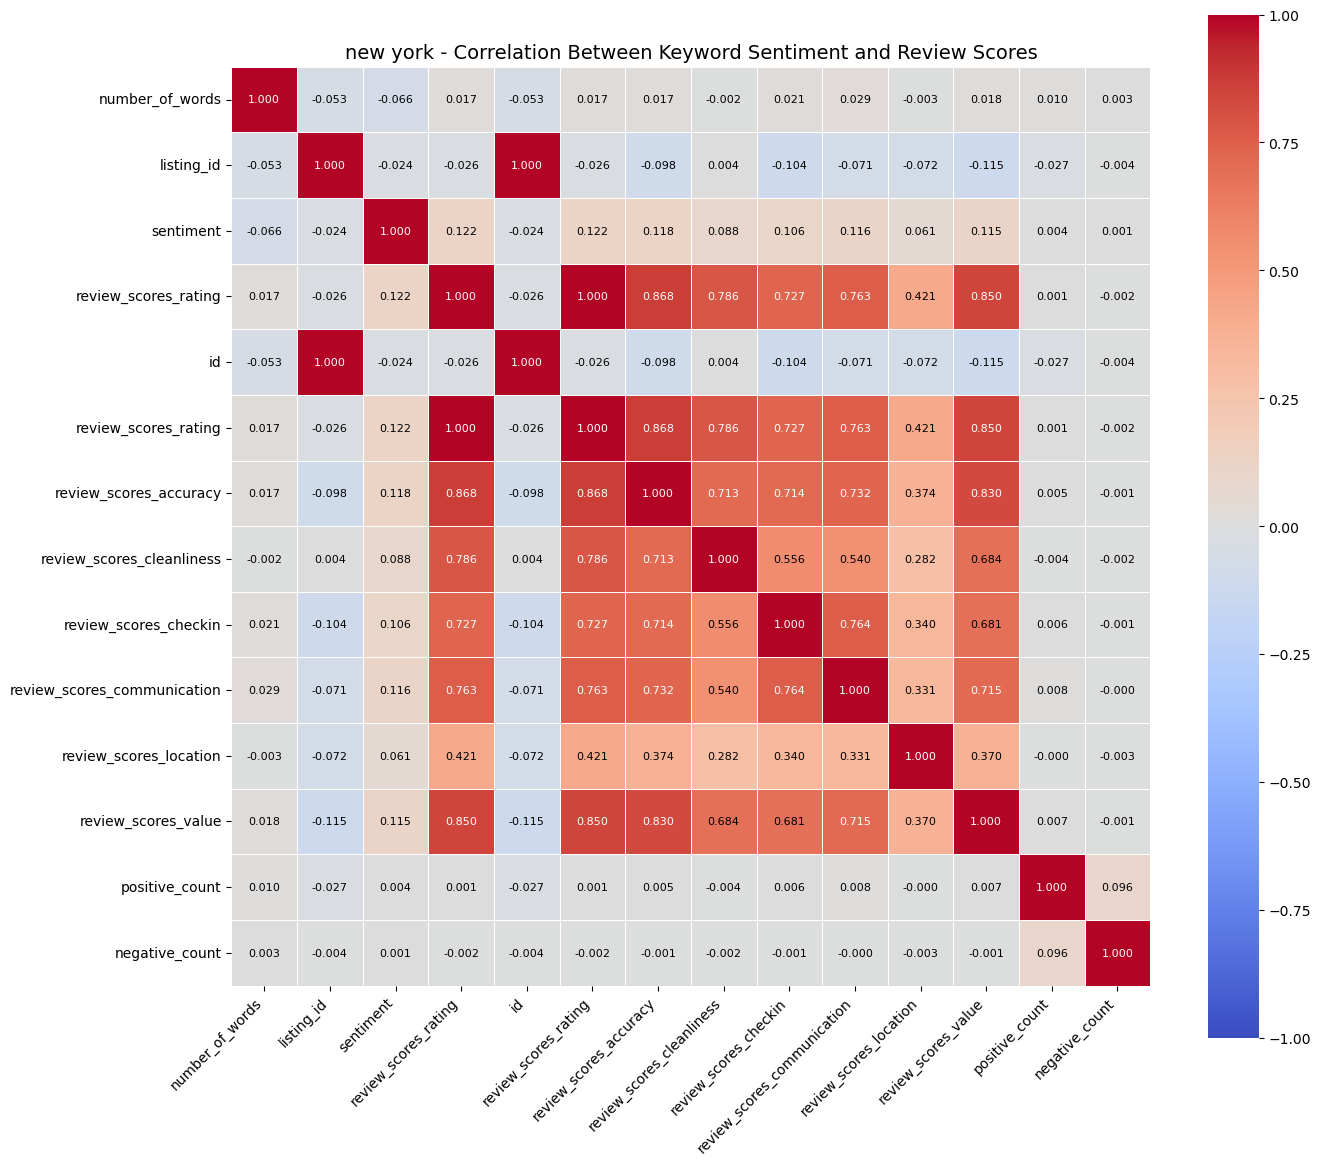

In [244]:
def plot_correlation_heatmap(correlation_matrix, city):
    plt.figure(figsize=(14, 12))
    
    ax = sns.heatmap(correlation_matrix, 
                     cmap='coolwarm', 
                     vmin=-1, vmax=1,
                     square=True,
                     linewidths=0.5)

    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)):
            text = f"{correlation_matrix.iloc[i, j]:.3f}"
            ax.text(j + 0.5, i + 0.5, text,
                    ha="center", va="center", 
                    color="black" if abs(correlation_matrix.iloc[i, j]) < 0.7 else "white",
                    fontsize=8)

    plt.title(f"{city} - Correlation Between Keyword Sentiment and Review Scores", fontsize=14)
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(correlation_matrix, city)